In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 1000)
import seaborn as sns

In [2]:
#drogas = pd.read_excel('Drogas_com_desc.xlsx')

In [4]:
drogas1 = pd.read_csv('Dados_20201230/apreensao_droga_2018_2019-06-GVG.csv', encoding = 'latin-1', sep = ';')
drogas2 = pd.read_csv('Dados_20201230/apreensao_droga_2019-07_2019-12-GVG.csv', encoding = 'latin-1', sep = ';')
drogas3 = pd.read_csv('Dados_20201230/apreensao_droga_2020-01_2020-06-GVG.csv', encoding = 'latin-1', sep = ';')
drogas4 = pd.read_csv('Dados_20201230/apreensao_droga_2020-07_2020-12-GVG.csv', encoding = 'latin-1', sep = ';')

In [ ]:
drogas20 = pd.read_csv('Drogas_GVG_20.csv', encoding = 'latin-1', sep = ';')
drogas1819 = pd.read_csv('Drogas_GVG_18_19.csv',encoding = 'latin-1',sep = ';') 

In [ ]:
drogas20 = drogas20.rename(columns={'TIPO_OBJETO':'NRO_INT_TIPO_OBJETO','TIPO_OBJETO.1':'TIPO_OBJETO',})
drogas1819 = drogas1819.rename(columns={'K93_NRO_INT_OBJETO':'NRO_INT_OBJETO', 'K93_NRO_INT_TIPO_OBJETO':'NRO_INT_TIPO_OBJETO' })

In [ ]:
drogas1819 = drogas1819.drop(['DESCRIÇÃO', 'NRO_INT_TIPO_OBJETO','   '], axis = 1)
drogas20 = drogas20.drop(['DESCRIÇÃO','NRO_INT_TIPO_OBJETO','   '], axis = 1)

In [ ]:
lista = [drogas1819,drogas20]
drogas = pd.concat(lista)

In [ ]:
drogas = drogas.reset_index(drop=True)

In [8]:
drogas = drogas.rename(columns={'NRO_INT_OBJETO':'CHAVE_OBJETO', 'QUANTIDADE':'TXT_VALOR_ATRIBUTO', 'TIPO_OBJETO':'TXT_TIPO_OBJETO','ATRIBUTO':'TXT_NOME_LABEL'})

In [9]:
drogas.sort_values(by='CHAVE_OBJETO')

,ÓRGÃO,ANO,NUMERO,CHAVE_OBJETO,TXT_TIPO_OBJETO,TXT_VALOR_ATRIBUTO,TXT_NOME_LABEL
0,100304,2018,3315,19338359,Maconha,1,Quantidade de Unidade(s)
1,100304,2018,3315,19338359,Maconha,"2,20",Peso Total
2,100304,2018,3315,19338359,Maconha,Grama,Unidade de Peso
3,100304,2018,3315,19338359,Maconha,Tijolo(s),Tipo de Embalagem
4,100304,2018,3315,19338359,Maconha,Verde,Cor Predominante
...,...,...,...,...,...,...,...
95064,152031,2020,1850,22889540,Cocaína,0.1,Peso Unitário
95065,152031,2020,1850,22889540,Cocaína,1,Quantidade de Unidade(s)
95066,152031,2020,1850,22889540,Cocaína,Branco,Cor Predominante
95067,152031,2020,1850,22889540,Cocaína,Embalagem contendo pó branco semelhante a coca...,Descrição


In [10]:
chaves = pd.DataFrame(drogas.CHAVE_OBJETO.value_counts())
chaves = chaves.reset_index()
chaves = chaves.drop(['CHAVE_OBJETO'], axis = 1)
chaves = chaves.rename(columns = {'index':'CHAVE_OBJETO'})
colunas = ['NUMERO', 'CHAVE_OBJETO', 'TXT_TIPO_OBJETO', 'Peso Unitário',
       'Peso Total', 'Quantidade de Unidade(s)', 'Descrição',
       'Cor Predominante', 'Unidade de Peso', 'Tipo de Embalagem']
resultado = drogas2 = pd.DataFrame(columns = colunas, index = range(1))

In [11]:
x = 0

while x < len(chaves):
    drogas_ = drogas.loc[drogas['CHAVE_OBJETO'] == chaves['CHAVE_OBJETO'][x]]
    drogas_ = drogas_.reset_index(drop=True)
    colunas = drogas_['TXT_NOME_LABEL'].tolist()
    drogas2 = pd.DataFrame(columns = colunas, index = range(len(drogas_)))
    teste = drogas_.T
    if len(drogas2) == 7:
        teste = teste.rename(columns={0:(teste[0]['TXT_NOME_LABEL']),1:(teste[1]['TXT_NOME_LABEL']),2:(teste[2]['TXT_NOME_LABEL']),
                                 3:(teste[3]['TXT_NOME_LABEL']),4:(teste[4]['TXT_NOME_LABEL']),5:(teste[5]['TXT_NOME_LABEL']),
                                     6:(teste[6]['TXT_NOME_LABEL'])})
        teste[colunas[0]]['NUMERO'] = teste[colunas[0]]['TXT_VALOR_ATRIBUTO']
        teste[colunas[1]]['NUMERO'] = teste[colunas[1]]['TXT_VALOR_ATRIBUTO']
        teste[colunas[2]]['NUMERO'] = teste[colunas[2]]['TXT_VALOR_ATRIBUTO']
        teste[colunas[3]]['NUMERO'] = teste[colunas[3]]['TXT_VALOR_ATRIBUTO']
        teste[colunas[4]]['NUMERO'] = teste[colunas[4]]['TXT_VALOR_ATRIBUTO']
        teste[colunas[5]]['NUMERO'] = teste[colunas[5]]['TXT_VALOR_ATRIBUTO']
        teste[colunas[6]]['NUMERO'] = teste[colunas[6]]['TXT_VALOR_ATRIBUTO']
        teste['ÓRGÃO'] = drogas_['ÓRGÃO'][0]
        teste['ANO'] = drogas_['ANO'][0]
        teste['NUMERO'] = drogas_.NUMERO[0]
        teste['CHAVE_OBJETO'] = drogas_.CHAVE_OBJETO[0]
        teste['TXT_TIPO_OBJETO'] = drogas_.TXT_TIPO_OBJETO[0]
        teste = teste.reset_index(drop=True)
        teste = teste[['ÓRGÃO','ANO','NUMERO','CHAVE_OBJETO','TXT_TIPO_OBJETO',colunas[0],colunas[1],colunas[2],colunas[3],colunas[4],colunas[5],colunas[6]]]
    if len(drogas2) == 6:
        teste = teste.rename(columns={0:(teste[0]['TXT_NOME_LABEL']),1:(teste[1]['TXT_NOME_LABEL']),2:(teste[2]['TXT_NOME_LABEL']),
                                 3:(teste[3]['TXT_NOME_LABEL']),4:(teste[4]['TXT_NOME_LABEL']),5:(teste[5]['TXT_NOME_LABEL'])})
        teste[colunas[0]]['NUMERO'] = teste[colunas[0]]['TXT_VALOR_ATRIBUTO']
        teste[colunas[1]]['NUMERO'] = teste[colunas[1]]['TXT_VALOR_ATRIBUTO']
        teste[colunas[2]]['NUMERO'] = teste[colunas[2]]['TXT_VALOR_ATRIBUTO']
        teste[colunas[3]]['NUMERO'] = teste[colunas[3]]['TXT_VALOR_ATRIBUTO']
        teste[colunas[4]]['NUMERO'] = teste[colunas[4]]['TXT_VALOR_ATRIBUTO']
        teste[colunas[5]]['NUMERO'] = teste[colunas[5]]['TXT_VALOR_ATRIBUTO']
        teste['ÓRGÃO'] = drogas_['ÓRGÃO'][0]
        teste['ANO'] = drogas_['ANO'][0]
        teste['NUMERO'] = drogas_.NUMERO[0]
        teste['CHAVE_OBJETO'] = drogas_.CHAVE_OBJETO[0]
        teste['TXT_TIPO_OBJETO'] = drogas_.TXT_TIPO_OBJETO[0]
        teste = teste.reset_index(drop=True)
        teste = teste[['ÓRGÃO','ANO','NUMERO','CHAVE_OBJETO','TXT_TIPO_OBJETO',colunas[0],colunas[1],colunas[2],colunas[3],colunas[4],colunas[5]]]
    if len(drogas2) == 5:
        teste = teste.rename(columns={0:(teste[0]['TXT_NOME_LABEL']),1:(teste[1]['TXT_NOME_LABEL']),2:(teste[2]['TXT_NOME_LABEL']),
                                 3:(teste[3]['TXT_NOME_LABEL']),4:(teste[4]['TXT_NOME_LABEL'])})

        teste[colunas[0]]['NUMERO'] = teste[colunas[0]]['TXT_VALOR_ATRIBUTO']
        teste[colunas[1]]['NUMERO'] = teste[colunas[1]]['TXT_VALOR_ATRIBUTO']
        teste[colunas[2]]['NUMERO'] = teste[colunas[2]]['TXT_VALOR_ATRIBUTO']
        teste[colunas[3]]['NUMERO'] = teste[colunas[3]]['TXT_VALOR_ATRIBUTO']
        teste[colunas[4]]['NUMERO'] = teste[colunas[4]]['TXT_VALOR_ATRIBUTO']
        teste['NUMERO'] = drogas_.NUMERO[0]
        teste['ÓRGÃO'] = drogas_['ÓRGÃO'][0]
        teste['ANO'] = drogas_['ANO'][0]
        teste['CHAVE_OBJETO'] = drogas_.CHAVE_OBJETO[0]
        teste['TXT_TIPO_OBJETO'] = drogas_.TXT_TIPO_OBJETO[0]
        teste = teste.reset_index(drop=True)
        teste = teste[['ÓRGÃO','ANO','NUMERO','CHAVE_OBJETO','TXT_TIPO_OBJETO',colunas[0],colunas[1],colunas[2],colunas[3],colunas[4]]]
    if len(drogas2) == 4:
        teste = teste.rename(columns={0:(teste[0]['TXT_NOME_LABEL']),1:(teste[1]['TXT_NOME_LABEL']),2:(teste[2]['TXT_NOME_LABEL']),
                                 3:(teste[3]['TXT_NOME_LABEL'])})
        teste[colunas[0]]['NUMERO'] = teste[colunas[0]]['TXT_VALOR_ATRIBUTO']
        teste[colunas[1]]['NUMERO'] = teste[colunas[1]]['TXT_VALOR_ATRIBUTO']
        teste[colunas[2]]['NUMERO'] = teste[colunas[2]]['TXT_VALOR_ATRIBUTO']
        teste[colunas[3]]['NUMERO'] = teste[colunas[3]]['TXT_VALOR_ATRIBUTO']
        teste['ÓRGÃO'] = drogas_['ÓRGÃO'][0]
        teste['ANO'] = drogas_['ANO'][0]
        teste['NUMERO'] = drogas_.NUMERO[0]
        teste['CHAVE_OBJETO'] = drogas_.CHAVE_OBJETO[0]
        teste['TXT_TIPO_OBJETO'] = drogas_.TXT_TIPO_OBJETO[0]
        teste = teste.reset_index(drop=True)
        teste = teste[['ÓRGÃO','ANO','NUMERO','CHAVE_OBJETO','TXT_TIPO_OBJETO',colunas[0],colunas[1],colunas[2],colunas[3]]]
    if len(drogas2) == 3:
        teste = teste.rename(columns={0:(teste[0]['TXT_NOME_LABEL']),1:(teste[1]['TXT_NOME_LABEL']),2:(teste[2]['TXT_NOME_LABEL'])})
        teste[colunas[0]]['NUMERO'] = teste[colunas[0]]['TXT_VALOR_ATRIBUTO']
        teste[colunas[1]]['NUMERO'] = teste[colunas[1]]['TXT_VALOR_ATRIBUTO']
        teste[colunas[2]]['NUMERO'] = teste[colunas[2]]['TXT_VALOR_ATRIBUTO']
        teste['ÓRGÃO'] = drogas_['ÓRGÃO'][0]
        teste['ANO'] = drogas_['ANO'][0]
        teste['NUMERO'] = drogas_.NUMERO[0]
        teste['CHAVE_OBJETO'] = drogas_.CHAVE_OBJETO[0]
        teste['TXT_TIPO_OBJETO'] = drogas_.TXT_TIPO_OBJETO[0]
        teste = teste.reset_index(drop=True)
        teste = teste[['ÓRGÃO','ANO','NUMERO','CHAVE_OBJETO','TXT_TIPO_OBJETO',colunas[0],colunas[1]]]

    teste1 = teste.iloc[2:3]
    lista = [resultado,teste1]
    resultado = pd.concat(lista)
    
    x += 1
resultado = resultado[['ÓRGÃO','ANO','NUMERO','CHAVE_OBJETO','TXT_TIPO_OBJETO','Peso Total',
       'Cor Predominante', 'Descrição', 'Unidade de Peso', 'Tipo de Embalagem',
       'Peso Unitário', 'Quantidade de Unidade(s)']]
resultado = resultado.reset_index(drop=True)
resultado = resultado[1:]
resultado = resultado.reset_index(drop=True)

In [17]:
resultado['Peso Total'] = resultado['Peso Total'].astype(float)

In [12]:
#resultado.to_excel('resultado_DROGAS20201002.xlsx')

In [16]:
resultado['Peso Unitário'] = resultado['Peso Unitário'].replace(',','.', regex=True)
resultado['Peso Total'] = resultado['Peso Total'].replace(',','.', regex=True)
resultado['Peso Unitário'] = resultado['Peso Unitário'].replace('-',0, regex=True)
resultado['Peso Total'] = resultado['Peso Total'].replace('-',0, regex=True)
resultado['Peso Unitário'] = resultado['Peso Unitário'].replace('',0, regex=True)
resultado['Peso Total'] = resultado['Peso Total'].replace('',0, regex=True)

resultado['Peso Unitário'] = resultado['Peso Unitário'].fillna(0)
resultado['Peso Total'] = resultado['Peso Total'].fillna(0)
resultado['Peso Total']  = resultado['Peso Total'].astype(float)
resultado['Peso Unitário']  = resultado['Peso Unitário'].astype(float)


<h1><center>COR</center></h1>

In [14]:
cores = resultado['Cor Predominante'].value_counts()
cores = pd.DataFrame(cores)
cores = cores.reset_index()
cores = cores.T
cores = cores.rename(columns={0:cores[0][0],1:cores[1][0],2:cores[2][0],3:cores[3][0],4:cores[4][0]
                             ,5:cores[5][0],6:cores[6][0],7:cores[7][0],8:cores[8][0],9:cores[9][0]
                             ,10:cores[10][0], 11:cores[11][0],12:cores[12][0]})
cores = cores.iloc[1:]
cores1 = resultado['Cor Predominante'].value_counts(normalize=True)
cores1 = pd.DataFrame(cores1)
cores1 = cores1.reset_index()
cores1 = cores1.T
cores1 = cores1.rename(columns={0:cores1[0][0],1:cores1[1][0],2:cores1[2][0],3:cores1[3][0],4:cores1[4][0]
                             ,5:cores1[5][0],6:cores1[6][0],7:cores1[7][0],8:cores1[8][0],9:cores1[9][0]
                             ,10:cores1[10][0], 11:cores1[11][0],12:cores1[12][0]})
#cores1 = cores.iloc[1:]
cores1
lista = [cores,cores1]
cores2 = pd.concat(lista)
cores2 = cores2.reset_index(drop=True)
cores2 = cores2.drop([1], axis = 0)
cores2 = cores2.rename(index={0:'Quantidade', 2:"%"})
cores2

,Verde,Branco,Marrom,Amarelo,Cinza,Bege,Incolor,Preto,Cobreado,Azul,Rosa,Dourado,Prateado,13,14,15,16
Quantidade,10140,3239,1390,1304,234,226,72,42,25,14,12,12,11,9,6,3,3
%,0.605662,0.193466,0.0830247,0.0778879,0.0139768,0.013499,0.00430056,0.00250866,0.00149325,0.00083622,0.00071676,0.00071676,0.00065703,0.00053757,0.00035838,0.00017919,0.00017919


Text(0.5, 1.0, 'Cor Predominante')

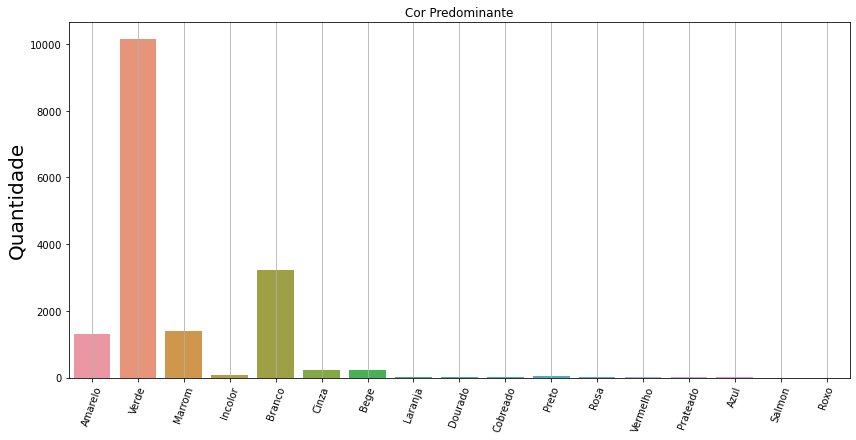

In [15]:
stores_df = resultado

f, (ax1) = plt.subplots(1, 1, figsize=(12, 6))
#palette ={"Verde": "green", "Marrom": "brown", "Branco": "white", "Amarelo": "yellow","Cinza":'grey',"Dourado":'gold',"Laranja":"orange","Azul":"Blue","Vermelho":"Red",'Bege':'beige',"Preto":"black", "Incolor":"blue", "Rosa":"pink", "Cobreado":'coper', "Prateado":'silver','Salmon':'salmon', "Roxo":'black'}

sns.countplot(x="Cor Predominante", data=stores_df, ax=ax1)
#sns.countplot(x="Tipo de Embalagem", data=stores_df, ax=ax2)
#sns.countplot(x="TXT_TIPO_OBJETO", data=stores_df, ax=ax3, palette= palette)
palette ={"Maconha": "green", "Cocaína": "white", "Crack": "yellow", "Drogas": "blue"}
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=70)
#plt.setp(ax2.xaxis.get_majorticklabels(), rotation=70)
ax1.set_ylabel("Quantidade",fontsize=20)
ax1.set(xlabel=None)
#ax2.set_ylabel("Quantidade",fontsize=20)
plt.tight_layout()
plt.grid(axis='x')
plt.title('Cor Predominante')

<h1><center>EMBALAGEM</center></h1>

In [16]:
cores = resultado['Tipo de Embalagem'].value_counts()
cores = pd.DataFrame(cores)
cores = cores.reset_index()
cores = cores.T
cores = cores.rename(columns={0:cores[0][0],1:cores[1][0],2:cores[2][0],3:cores[3][0],4:cores[4][0]
                             ,5:cores[5][0],6:cores[6][0],7:cores[7][0],8:cores[8][0],9:cores[9][0]
                             ,10:cores[10][0], 11:cores[11][0],12:cores[12][0]})
cores = cores.iloc[1:]
cores1 = resultado['Tipo de Embalagem'].value_counts(normalize=True)
cores1 = pd.DataFrame(cores1)
cores1 = cores1.reset_index()
cores1 = cores1.T
cores1 = cores1.rename(columns={0:cores1[0][0],1:cores1[1][0],2:cores1[2][0],3:cores1[3][0],4:cores1[4][0]
                             ,5:cores1[5][0],6:cores1[6][0],7:cores1[7][0],8:cores1[8][0],9:cores1[9][0]
                             ,10:cores1[10][0], 11:cores1[11][0],12:cores1[12][0]})
#cores1 = cores.iloc[1:]
cores1
lista = [cores,cores1]
cores2 = pd.concat(lista)
cores2 = cores2.reset_index(drop=True)
cores2 = cores2.drop([1], axis = 0)
cores2 = cores2.rename(index={0:'Quantidade', 2:"%"})
cores2 = cores2.rename(columns={13:'Maço(s)', 14:'Kit(s)'})
cores2

,Porção(es),Cigarro(s),Unidade(s),Tijolo(s),Saco(s),Pacote(s),Não soube informar,Frasco(s),Comprimido(s),Ponto(s),Caixa(s),Maço(s),Lata(s),Maço(s),Kit(s)
Quantidade,10559,4476,901,574,199,131,123,110,29,24,11,7,7,3,2
%,0.61547,0.2609,0.0525181,0.0334577,0.0115994,0.00763581,0.0071695,0.00641175,0.00169037,0.00139893,0.000641175,0.000408021,0.000408021,0.000174866,0.000116577


Text(0.5, 1.0, 'Embalagem')

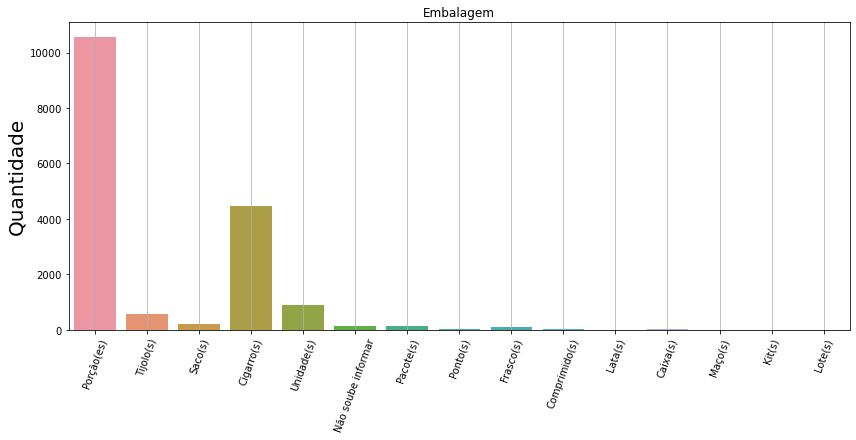

In [17]:
stores_df = resultado

f, (ax2) = plt.subplots(1, 1, figsize=(12, 6))
palette ={"Verde": "green", "Marrom": "brown", "Branco": "white", "Amarelo": "yellow","Cinza":'grey',"Dourado":'gold',"Laranja":"orange","Azul":"Blue","Vermelho":"Red",'Bege':'beige',"Preto":"black", "Incolor":"blue", "Rosa":"pink"}

#sns.countplot(x="Cor Predominante", data=stores_df, ax=ax1, palette = palette)
sns.countplot(x="Tipo de Embalagem", data=stores_df, ax=ax2)
#sns.countplot(x="TXT_TIPO_OBJETO", data=stores_df, ax=ax3, palette= palette)
palette ={"Maconha": "green", "Cocaína": "white", "Crack": "yellow", "Drogas": "blue"}
#plt.setp(ax1.xaxis.get_majorticklabels(), rotation=70)
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=70)
ax2.set(xlabel=None)
#ax1.set_ylabel("Quantidade",fontsize=20)
ax2.set_ylabel("Quantidade",fontsize=20)
plt.tight_layout()
plt.grid(axis='x')
plt.title('Embalagem')

<h1><center>UNIDADE DE PESO</center></h1>

In [18]:
cores = resultado['Unidade de Peso'].value_counts()
cores = pd.DataFrame(cores)
cores = cores.reset_index()
cores = cores.T
cores = cores.rename(columns={0:cores[0][0],1:cores[1][0],2:cores[2][0],3:cores[3][0],4:cores[4][0],5:cores[5][0]})
cores = cores.iloc[1:]
cores1 = resultado['Unidade de Peso'].value_counts(normalize=True)
cores1 = pd.DataFrame(cores1)
cores1 = cores1.reset_index()
cores1 = cores1.T
cores1 = cores1.rename(columns={0:cores1[0][0],1:cores1[1][0],2:cores1[2][0],3:cores1[3][0],4:cores1[4][0],5:cores1[5][0]
                             })
#cores1 = cores.iloc[1:]
cores1
lista = [cores,cores1]
cores2 = pd.concat(lista)
cores2 = cores2.reset_index(drop=True)
cores2 = cores2.drop([1], axis = 0)
cores2 = cores2.rename(index={0:'Quantidade', 2:"%"})
cores2

,Grama,Não soube informar,Miligrama,Quilograma,Decigrama,Tonelada
Quantidade,10669,2157,210,41,32,2
%,0.813744,0.164518,0.0160171,0.00312715,0.0024407,0.000152544


Text(0.5, 1.0, 'Unidade de Peso')

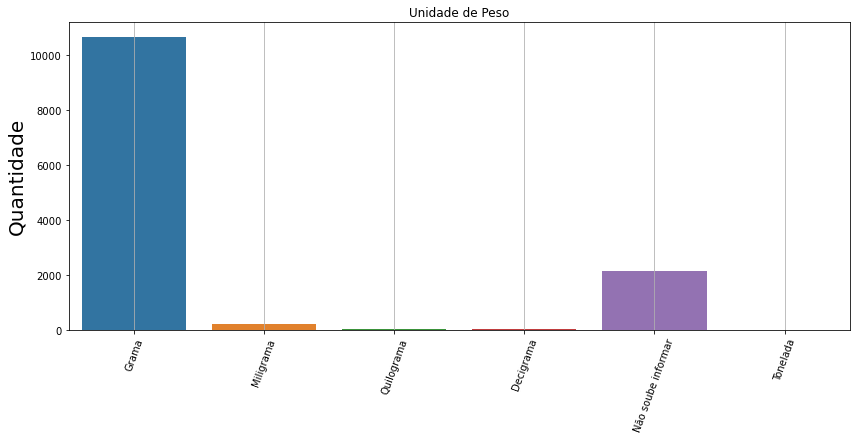

In [19]:
stores_df = resultado

f, (ax2) = plt.subplots(1, 1, figsize=(12, 6))
palette ={"Verde": "green", "Marrom": "brown", "Branco": "white", "Amarelo": "yellow","Cinza":'grey',"Dourado":'gold',"Laranja":"orange","Azul":"Blue","Vermelho":"Red",'Bege':'beige',"Preto":"black", "Incolor":"blue", "Rosa":"pink"}

#sns.countplot(x="Cor Predominante", data=stores_df, ax=ax1, palette = palette)
sns.countplot(x="Unidade de Peso", data=stores_df, ax=ax2)
#sns.countplot(x="TXT_TIPO_OBJETO", data=stores_df, ax=ax3, palette= palette)
palette ={"Maconha": "green", "Cocaína": "white", "Crack": "yellow", "Drogas": "blue"}
#plt.setp(ax1.xaxis.get_majorticklabels(), rotation=70)
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=70)
ax2.set(xlabel=None)
#ax1.set_ylabel("Quantidade",fontsize=20)
ax2.set_ylabel("Quantidade",fontsize=20)
plt.grid(axis='x')
plt.tight_layout()
plt.title('Unidade de Peso')

In [20]:
sem_info = resultado.loc[resultado['Unidade de Peso'] == 'Não soube informar']
sem_info['Tipo de Embalagem'].value_counts()

Porção(es)            1115
Cigarro(s)             693
Tijolo(s)              140
Unidade(s)             123
Não soube informar      20
Saco(s)                 19
Pacote(s)               15
Frasco(s)               15
Comprimido(s)            9
Caixa(s)                 4
Ponto(s)                 2
Maço(s)                  2
Name: Tipo de Embalagem, dtype: int64

In [21]:
sem_info = resultado.loc[resultado['Unidade de Peso'] == 'Não soube informar']
com_info = resultado.loc[resultado['Unidade de Peso'] != 'Não soube informar']
com_info = com_info.reset_index(drop= True)
sem_info = sem_info.reset_index(drop=True)


In [22]:
porcao = com_info.loc[com_info['Tipo de Embalagem'] == 'Porção(es)']
porcao = porcao.loc[porcao['Unidade de Peso'] == 'Grama']
porcao = porcao.loc[porcao['Peso Unitário'].notna()]
porcao = porcao.reset_index(drop=True)
x = 0
while x < len(porcao):
    if porcao['Peso Unitário'][x] == '-':
        porcao['Peso Unitário'][x] = 0
    x += 1
    
porcao['Peso Unitário'] = porcao['Peso Unitário'].astype(float) 


In [23]:
print('Média')
print(porcao['Peso Unitário'].mean())
print('Mediana')
print(porcao['Peso Unitário'].median())
print('Quartil')
print(porcao['Peso Unitário'].quantile(0.25))

Média
2.7557982327159762
Mediana
0.02
Quartil
0.0


In [24]:
porcao_sem = sem_info.loc[sem_info['Tipo de Embalagem'] == 'Porção(es)']
porcao_sem['Unidade de Peso'] = 'Grama'
porcao_sem['Peso Unitário'] = porcao['Peso Unitário'].median()


<ipython-input-24-d89a6afb6baa>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  porcao_sem['Unidade de Peso'] = 'Grama'
<ipython-input-24-d89a6afb6baa>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  porcao_sem['Peso Unitário'] = porcao['Peso Unitário'].median()


In [25]:
cigarro_com = com_info.loc[com_info['Tipo de Embalagem'] == 'Cigarro(s)']
cigarro_com = cigarro_com.loc[cigarro_com['Unidade de Peso'] == 'Grama']
cigarro_com = cigarro_com.loc[cigarro_com['Peso Unitário'].notna()]
cigarro_com = cigarro_com.reset_index(drop=True)
cigarro_com['Peso Unitário'] = cigarro_com['Peso Unitário'].astype(float) 
print('Média')
print(cigarro_com['Peso Unitário'].mean())
print('Mediana')
print(cigarro_com['Peso Unitário'].median())
print('Quartil')
print(cigarro_com['Peso Unitário'].quantile(0.25))

Média
0.913903563941297
Mediana
0.05
Quartil
0.0


In [26]:
cigarro_sem = sem_info.loc[sem_info['Tipo de Embalagem'] == 'Cigarro(s)']
cigarro_sem['Unidade de Peso'] = 'Grama'
cigarro_sem['Peso Unitário'] = cigarro_com['Peso Unitário'].median()

<ipython-input-26-66b5cac40cb9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cigarro_sem['Unidade de Peso'] = 'Grama'
<ipython-input-26-66b5cac40cb9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cigarro_sem['Peso Unitário'] = cigarro_com['Peso Unitário'].median()


In [27]:
unidade_com = com_info.loc[com_info['Tipo de Embalagem'] == 'Unidade(s)']
unidade_com = unidade_com.loc[unidade_com['Unidade de Peso'] == 'Grama']
unidade_com = unidade_com.loc[unidade_com['Peso Unitário'].notna()]
unidade_com = unidade_com.reset_index(drop=True)
unidade_com['Peso Unitário'] = unidade_com['Peso Unitário'].astype(float) 
print('Média')
print(unidade_com['Peso Unitário'].mean())
print('Mediana')
print(unidade_com['Peso Unitário'].median())
print('Quartil')
print(unidade_com['Peso Unitário'].quantile(0.25))

Média
0.4547921225382931
Mediana
0.0
Quartil
0.0


In [28]:
unidade_sem = sem_info.loc[sem_info['Tipo de Embalagem'] == 'Unidade(s)']
unidade_sem['Unidade de Peso'] = 'Grama'
unidade_sem['Peso Unitário'] = unidade_com['Peso Unitário'].median()

<ipython-input-28-b8d781e651e5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unidade_sem['Unidade de Peso'] = 'Grama'
<ipython-input-28-b8d781e651e5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unidade_sem['Peso Unitário'] = unidade_com['Peso Unitário'].median()


In [29]:
tijolo_com = com_info.loc[com_info['Tipo de Embalagem'] == 'Tijolo(s)']
tijolo_com = tijolo_com.loc[tijolo_com['Unidade de Peso'] == 'Grama']
tijolo_com = tijolo_com.loc[tijolo_com['Peso Unitário'].notna()]
tijolo_com = tijolo_com.reset_index(drop=True)
tijolo_com['Peso Unitário'] = tijolo_com['Peso Unitário'].astype(float) 
print('Média')
print(tijolo_com['Peso Unitário'].mean())
print('Mediana')
print(tijolo_com['Peso Unitário'].median())
print('Quartil')
print(tijolo_com['Peso Unitário'].quantile(0.25))

Média
14.444132492113573
Mediana
1.0
Quartil
0.0


In [30]:
tijolo_sem = sem_info.loc[sem_info['Tipo de Embalagem'] == 'Tijolo(s)']
tijolo_sem['Unidade de Peso'] = 'Grama'
tijolo_sem['Peso Unitário'] = tijolo_com['Peso Unitário'].median()

<ipython-input-30-c09daff63faa>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tijolo_sem['Unidade de Peso'] = 'Grama'
<ipython-input-30-c09daff63faa>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tijolo_sem['Peso Unitário'] = tijolo_com['Peso Unitário'].median()


In [31]:
frasco_com = com_info.loc[com_info['Tipo de Embalagem'] == 'Frasco(s)']
frasco_com = frasco_com.loc[frasco_com['Unidade de Peso'] == 'Grama']
frasco_com = frasco_com.loc[frasco_com['Peso Unitário'].notna()]
frasco_com = frasco_com.reset_index(drop=True)
frasco_com['Peso Unitário'] = frasco_com['Peso Unitário'].astype(float) 
print('Média')
print(frasco_com['Peso Unitário'].mean())
print('Mediana')
print(frasco_com['Peso Unitário'].median())
print('Quartil')
print(frasco_com['Peso Unitário'].quantile(0.25))

Média
0.4732432432432434
Mediana
0.05
Quartil
0.0


In [32]:
frasco_sem = sem_info.loc[sem_info['Tipo de Embalagem'] == 'Frasco(s)']
frasco_sem['Unidade de Peso'] = 'Grama'
frasco_sem['Peso Unitário'] = frasco_com['Peso Unitário'].median()

<ipython-input-32-2af5dd2e9085>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frasco_sem['Unidade de Peso'] = 'Grama'
<ipython-input-32-2af5dd2e9085>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frasco_sem['Peso Unitário'] = frasco_com['Peso Unitário'].median()


In [33]:
pacote_com = com_info.loc[com_info['Tipo de Embalagem'] == 'Pacote(s)']
pacote_com = pacote_com.loc[pacote_com['Unidade de Peso'] == 'Grama']
pacote_com = pacote_com.loc[pacote_com['Peso Unitário'].notna()]
pacote_com = pacote_com.reset_index(drop=True)
pacote_com['Peso Unitário'] = pacote_com['Peso Unitário'].astype(float) 
print('Média')
print(pacote_com['Peso Unitário'].mean())
print('Mediana')
print(pacote_com['Peso Unitário'].median())
print('Quartil')
print(pacote_com['Peso Unitário'].quantile(0.25))

Média
35.92757575757577
Mediana
0.5
Quartil
0.0


In [34]:
pacote_sem = sem_info.loc[sem_info['Tipo de Embalagem'] == 'Pacote(s)']
pacote_sem['Unidade de Peso'] = 'Grama'
pacote_sem['Peso Unitário'] = pacote_com['Peso Unitário'].median()

<ipython-input-34-24ddaea02c93>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pacote_sem['Unidade de Peso'] = 'Grama'
<ipython-input-34-24ddaea02c93>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pacote_sem['Peso Unitário'] = pacote_com['Peso Unitário'].median()


In [35]:
saco_com = com_info.loc[com_info['Tipo de Embalagem'] == 'Saco(s)']
saco_com = saco_com.loc[saco_com['Unidade de Peso'] == 'Grama']
saco_com = saco_com.loc[saco_com['Peso Unitário'].notna()]
saco_com = saco_com.reset_index(drop=True)
saco_com['Peso Unitário'] = saco_com['Peso Unitário'].astype(float) 
print('Média')
print(saco_com['Peso Unitário'].mean())
print('Mediana')
print(saco_com['Peso Unitário'].median())
print('Quartil')
print(saco_com['Peso Unitário'].quantile(0.25))

Média
5.620694444444443
Mediana
0.3
Quartil
0.0


In [36]:
saco_sem = sem_info.loc[sem_info['Tipo de Embalagem'] == 'Saco(s)']
saco_sem['Unidade de Peso'] = 'Grama'
saco_sem['Peso Unitário'] = saco_com['Peso Unitário'].median()

<ipython-input-36-b5db476f70dd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  saco_sem['Unidade de Peso'] = 'Grama'
<ipython-input-36-b5db476f70dd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  saco_sem['Peso Unitário'] = saco_com['Peso Unitário'].median()


In [37]:
ponto_com = com_info.loc[com_info['Tipo de Embalagem'] == 'Ponto(s)']
ponto_com = ponto_com.loc[ponto_com['Unidade de Peso'] == 'Grama']
ponto_com = ponto_com.loc[ponto_com['Peso Unitário'].notna()]
ponto_com = ponto_com.reset_index(drop=True)
ponto_com['Peso Unitário'] = ponto_com['Peso Unitário'].astype(float) 
print('Média')
print(ponto_com['Peso Unitário'].mean())
print('Mediana')
print(ponto_com['Peso Unitário'].median())
print('Quartil')
print(ponto_com['Peso Unitário'].quantile(0.25))

Média
0.7077777777777778
Mediana
0.15000000000000002
Quartil
0.01


In [38]:
ponto_sem = sem_info.loc[sem_info['Tipo de Embalagem'] == 'Ponto(s)']
ponto_sem['Unidade de Peso'] = 'Grama'
ponto_sem['Peso Unitário'] = ponto_com['Peso Unitário'].median()

<ipython-input-38-138be28d07db>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ponto_sem['Unidade de Peso'] = 'Grama'
<ipython-input-38-138be28d07db>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ponto_sem['Peso Unitário'] = ponto_com['Peso Unitário'].median()


In [39]:
lista = [ponto_sem, saco_sem, tijolo_sem, unidade_sem, cigarro_sem, pacote_sem, frasco_sem, porcao_sem]
sem_info2 = pd.concat(lista)

In [40]:
lista = [sem_info2, com_info]
resultado = pd.concat(lista)
resultado = resultado.reset_index(drop=True)


In [41]:
resultado['Unidade de Peso'].value_counts()

Grama         12791
Miligrama       210
Quilograma       41
Decigrama        32
Tonelada          2
Name: Unidade de Peso, dtype: int64

In [42]:
cores = resultado['Unidade de Peso'].value_counts()
cores = pd.DataFrame(cores)
cores = cores.reset_index()
cores = cores.T
cores = cores.rename(columns={0:cores[0][0],1:cores[1][0],2:cores[2][0],3:cores[3][0]})
cores = cores.iloc[1:]
cores1 = resultado['Unidade de Peso'].value_counts(normalize=True)
cores1 = pd.DataFrame(cores1)
cores1 = cores1.reset_index()
cores1 = cores1.T
cores1 = cores1.rename(columns={0:cores1[0][0],1:cores1[1][0],2:cores1[2][0],3:cores1[3][0]
                             })
#cores1 = cores.iloc[1:]
cores1
lista = [cores,cores1]
cores2 = pd.concat(lista)
cores2 = cores2.reset_index(drop=True)
cores2 = cores2.drop([1], axis = 0)
cores2 = cores2.rename(index={0:'Quantidade', 2:"%"})
cores2

,Grama,Miligrama,Quilograma,Decigrama,4
Quantidade,12791,210,41,32,2
%,0.978204,0.01606,0.00313552,0.00244723,0.000152952


Text(0.5, 1.0, 'Unidade de Peso')

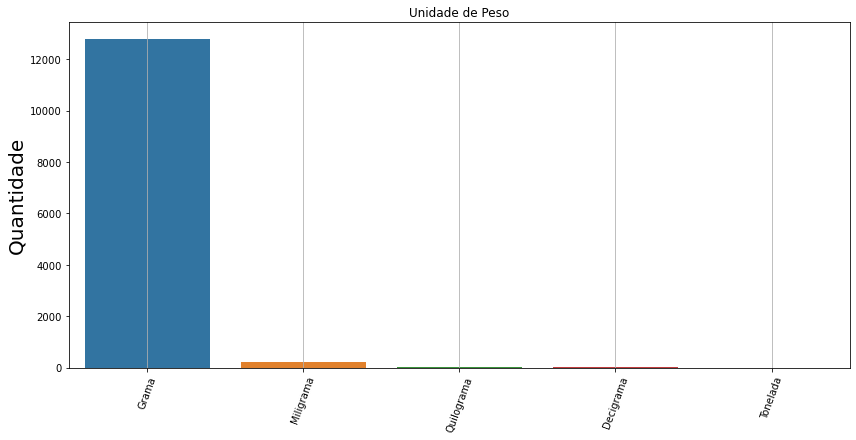

In [43]:
stores_df = resultado

f, (ax2) = plt.subplots(1, 1, figsize=(12, 6))
palette ={"Verde": "green", "Marrom": "brown", "Branco": "white", "Amarelo": "yellow","Cinza":'grey',"Dourado":'gold',"Laranja":"orange","Azul":"Blue","Vermelho":"Red",'Bege':'beige',"Preto":"black", "Incolor":"blue", "Rosa":"pink"}

#sns.countplot(x="Cor Predominante", data=stores_df, ax=ax1, palette = palette)
sns.countplot(x="Unidade de Peso", data=stores_df, ax=ax2)
#sns.countplot(x="TXT_TIPO_OBJETO", data=stores_df, ax=ax3, palette= palette)
palette ={"Maconha": "green", "Cocaína": "white", "Crack": "yellow", "Drogas": "blue"}
#plt.setp(ax1.xaxis.get_majorticklabels(), rotation=70)
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=70)
ax2.set(xlabel=None)
#ax1.set_ylabel("Quantidade",fontsize=20)
ax2.set_ylabel("Quantidade",fontsize=20)
plt.grid(axis='x')
plt.tight_layout()
plt.title('Unidade de Peso')

<h1><center>TIPO DE OBJETO</center></h1>

In [44]:
cores = resultado['TXT_TIPO_OBJETO'].value_counts()
cores = pd.DataFrame(cores)
cores = cores.reset_index()
cores = cores.T
cores = cores.rename(columns={0:cores[0][0],1:cores[1][0],2:cores[2][0],3:cores[3][0]})
cores = cores.iloc[1:]
cores1 = resultado['TXT_TIPO_OBJETO'].value_counts(normalize=True)
cores1 = pd.DataFrame(cores1)
cores1 = cores1.reset_index()
cores1 = cores1.T
cores1 = cores1.rename(columns={0:cores1[0][0],1:cores1[1][0],2:cores1[2][0],3:cores1[3][0][0]
                             })
#cores1 = cores.iloc[1:]
cores1
lista = [cores,cores1]
cores2 = pd.concat(lista)
cores2 = cores2.reset_index(drop=True)
cores2 = cores2.drop([1], axis = 0)
cores2 = cores2.rename(index={0:'Quantidade', 2:"%"})
cores2['Crack']['%'] = cores2['C']['%']
cores2 = cores2.drop(['C'], axis = 1)
cores2

,Drogas,Maconha,Cocaína,Crack
Quantidade,8190,7101,1522,824
%,0.464365,0.402619,0.0862959,0.04672


Text(0.5, 1.0, 'Tipo de Objeto')

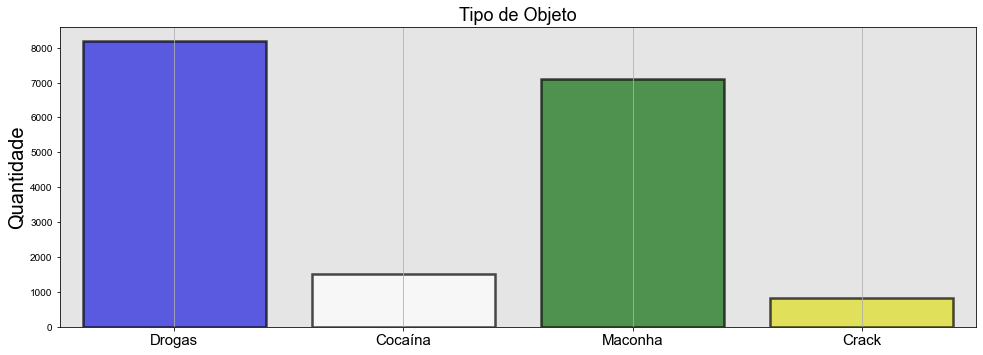

In [45]:
stores_df = resultado

palette ={"Maconha": "green", "Cocaína": "white", "Crack": "yellow", "Drogas": "blue"}
f, (ax3) = plt.subplots(1, 1, figsize=(14, 5))
sns.set(font_scale=1.5)

sns.countplot(x="TXT_TIPO_OBJETO", data=stores_df, ax=ax3, palette= palette, alpha = 0.7, linewidth=2.5, edgecolor=".0")
ax3.set_facecolor('#ababab')
ax3.patch.set_alpha(0.3)
ax3.set_xlabel("Tipo de Objeto",fontsize=20)
ax3.set_ylabel("Quantidade",fontsize=20)
ax3.set_xticklabels(ax3.get_xmajorticklabels(), fontsize = 15)
#ax3.set_yticklabels(ax3,fontsize = 18)
ax3.set(xlabel=None)
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=70)
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=70)
plt.grid(axis='x')
plt.tight_layout()
plt.title('Tipo de Objeto')

In [46]:
Drogas = resultado.loc[resultado['TXT_TIPO_OBJETO'] == 'Drogas']
Drogas.sample(5)

,ÓRGÃO,ANO,NUMERO,CHAVE_OBJETO,TXT_TIPO_OBJETO,Peso Total,Cor Predominante,Descrição,Unidade de Peso,Tipo de Embalagem,Peso Unitário,Quantidade de Unidade(s)
10146,151105.0,2020.0,2200,22103140,Drogas,0.05,Verde,NaN,Grama,Porção(es),0.05,1
13800,153322.0,2019.0,1185,21447390,Drogas,0.00,Verde,01 CIGARRO ARTESANAL DE MACONHA,NaN,Cigarro(s),0.00,1
1205,250152.0,2020.0,2162,22802289,Drogas,0.00,Verde,UMA PEQUENA PORÇÃO DE MACONHA,Grama,Porção(es),0.02,1
6798,151335.0,2020.0,555,22312182,Drogas,0.70,Branco,UMA PORÇÃO SEMELHANTE A COCAÍNA EMBALADA NUMA ...,Grama,Porção(es),0.70,1
3812,151029.0,2020.0,1624,22137653,Drogas,1.00,Verde,01 PORÇÃO DE MACONHA PESANDO 1G,Grama,Porção(es),1.00,1


In [47]:
import unidecode

Drogas = resultado.loc[resultado['TXT_TIPO_OBJETO'] == 'Drogas']
Outras = resultado.loc[resultado['TXT_TIPO_OBJETO'] != 'Drogas']
Outras = Outras.reset_index(drop= True)
DrogasNA = Drogas.loc[Drogas['Descrição'].isnull()]
DrogasNA = DrogasNA.reset_index(drop=True)
Drogas = Drogas.loc[Drogas['Descrição'].notna()]
Drogas = Drogas.reset_index(drop=True)

x = 0
while x < len(Drogas):
    frase = Drogas['Descrição'][x]
    frase = frase.replace(',','')
    frase = frase.replace('.','')
    frase = unidecode.unidecode(frase)
    Drogas['Descrição'][x] = frase
    x += 1
    
Drogas['Descrição'] = Drogas['Descrição'].str.lower()



<ipython-input-47-75a8727fb8a5>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Drogas['Descrição'][x] = frase


In [48]:

Drogas = Drogas.reset_index(drop=True)
x = 0
m = 0
c = 0
ck = 0
mc = 0
mck = 0
cck = 0
while x < len(Drogas):
    if 'maconha' in Drogas.Descrição[x]:
        Drogas['TXT_TIPO_OBJETO'].loc[x] = 'Maconha'
        m += 1
    if 'cannabis' in Drogas.Descrição[x]:
        Drogas['TXT_TIPO_OBJETO'].loc[x] = 'Maconha'
        m += 1
    if 'canabis' in Drogas.Descrição[x]:
        Drogas['TXT_TIPO_OBJETO'].loc[x] = 'Maconha'
        m += 1
        
    if 'cocaina' in Drogas.Descrição[x]:
        Drogas['TXT_TIPO_OBJETO'].loc[x] = 'Cocaína'
        c += 1
    if 'crack' in Drogas.Descrição[x]:
        Drogas['TXT_TIPO_OBJETO'].loc[x] = 'Crack'
        ck += 1
    if 'maconha' in Drogas.Descrição[x] and 'cocaina' in Drogas.Descrição[x]:
        mc += 1
    if 'maconha' in Drogas.Descrição[x] and 'crack' in Drogas.Descrição[x]:
        mck += 1
    if 'cocaina' in Drogas.Descrição[x] and 'crack' in Drogas.Descrição[x]:
        cck += 1
    x += 1

print('Achei %d maconha ' % m)
print('Achei %d cocaina ' % c)
print('Achei %d crack ' % ck)
print('Achei %d com maconha e cocaina' % mc)
print('Achei %d com maconha e crack' % mck)
print('Achei %d com cocaina e crack' % cck)

C:\Users\HJONER\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


Achei 5431 maconha 
Achei 1228 cocaina 
Achei 736 crack 
Achei 5 com maconha e cocaina
Achei 5 com maconha e crack
Achei 1 com cocaina e crack


In [49]:
listaDrogas = [Drogas, DrogasNA]
Drogas = pd.concat(listaDrogas)
Drogas = Drogas.reset_index(drop=True)
lista = [Drogas, Outras]
Todas = pd.concat(lista)
Todas = Todas.reset_index(drop=True)

Text(0.5, 1.0, 'Tipo de Objeto')

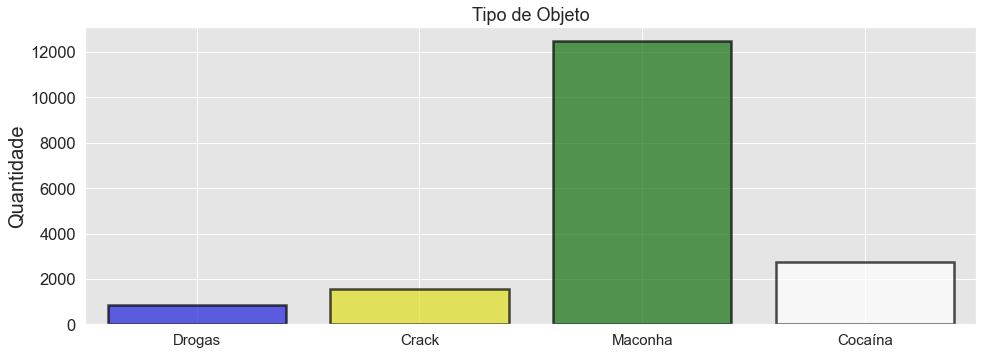

In [50]:
stores_df = Todas

palette ={"Maconha": "green", "Cocaína": "white", "Crack": "yellow", "Drogas": "blue"}
f, (ax3) = plt.subplots(1, 1, figsize=(14, 5))
sns.set(font_scale=1.5)

sns.countplot(x="TXT_TIPO_OBJETO", data=stores_df, ax=ax3, palette= palette, alpha = 0.7, linewidth=2.5, edgecolor=".0")
ax3.set_facecolor('#ababab')
ax3.patch.set_alpha(0.3)
ax3.set_xlabel("Tipo de Objeto",fontsize=20)
ax3.set_ylabel("Quantidade",fontsize=20)
ax3.set_xticklabels(ax3.get_xmajorticklabels(), fontsize = 15)
#ax3.set_yticklabels(ax3,fontsize = 18)

plt.setp(ax1.xaxis.get_majorticklabels(), rotation=70)
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=70)
ax3.set(xlabel=None)
plt.grid(axis='x')
plt.tight_layout()
plt.title('Tipo de Objeto')

In [51]:
cores = Todas['TXT_TIPO_OBJETO'].value_counts()
cores = pd.DataFrame(cores)
cores = cores.reset_index()
cores = cores.T
cores = cores.rename(columns={0:cores[0][0],1:cores[1][0],2:cores[2][0],3:cores[3][0]})
cores = cores.iloc[1:]
cores1 = Todas['TXT_TIPO_OBJETO'].value_counts(normalize=True)
cores1 = pd.DataFrame(cores1)
cores1 = cores1.reset_index()
cores1 = cores1.T
cores1 = cores1.rename(columns={0:cores1[0][0],1:cores1[1][0],2:cores1[2][0],3:cores1[3][0][0]
                             })
#cores1 = cores.iloc[1:]
cores1
lista = [cores,cores1]
cores2 = pd.concat(lista)
cores2 = cores2.reset_index(drop=True)
cores2 = cores2.drop([1], axis = 0)
cores2 = cores2.rename(index={0:'Quantidade', 2:"%"})
cores2['Drogas']['%'] = cores2['D']['%']
cores2 = cores2.drop(['D'], axis = 1)
cores2

,Maconha,Cocaína,Crack,Drogas
Quantidade,12489,2749,1560,839
%,0.708114,0.155866,0.0884504,0.0475704


In [52]:
resultado['Unidade de Peso'].value_counts()

Grama         12791
Miligrama       210
Quilograma       41
Decigrama        32
Tonelada          2
Name: Unidade de Peso, dtype: int64

In [53]:
x = 0
while x < len(resultado):
    if resultado['Unidade de Peso'][x] == 'Miligrama':
        resultado['Peso Unitário'][x] = resultado['Peso Unitário'][x] / 1000
        resultado['Unidade de Peso'][x] = 'Grama'
    if resultado['Unidade de Peso'][x] == 'Quilograma':
        resultado['Peso Unitário'][x] = resultado['Peso Unitário'][x] * 1000
        resultado['Unidade de Peso'][x] = 'Grama'
    if resultado['Unidade de Peso'][x] == 'Decigrama':
        resultado['Peso Unitário'][x] = resultado['Peso Unitário'][x] / 10
        resultado['Unidade de Peso'][x] = 'Grama'
    if resultado['Unidade de Peso'][x] == 'Tonelada':
        resultado['Peso Unitário'][x] = resultado['Peso Unitário'][x] * 1000000
        resultado['Unidade de Peso'][x] = 'Grama'
    else:
        x = x
    x += 1

<ipython-input-53-6be06a8b42f8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  resultado['Peso Unitário'][x] = resultado['Peso Unitário'][x] / 1000
<ipython-input-53-6be06a8b42f8>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  resultado['Unidade de Peso'][x] = 'Grama'
<ipython-input-53-6be06a8b42f8>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  resultado['Peso Unitário'][x] = resultado['Peso Unitário'][x] * 1000
<ipython-input-5

In [54]:
x = 0

while x < len(resultado):
    if resultado['Quantidade de Unidade(s)'][x] == '-':
        resultado['Quantidade de Unidade(s)'][x] = 0
    x += 1

<ipython-input-54-2a2ac7c17562>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  resultado['Quantidade de Unidade(s)'][x] = 0


In [55]:
resultado['Quantidade de Unidade(s)'] = resultado['Quantidade de Unidade(s)'].astype(float) 

In [56]:
resultado2 = resultado.loc[resultado['Peso Total'] > 0]
resultado2 = resultado2.reset_index(drop=True)
resultado2.shape
# RESULTADO 2 = COM PESO TOTAL, PRONTO #

(8194, 12)

In [57]:
semtotal = resultado.loc[resultado['Peso Total'] < 0.001]
semtotal = semtotal.reset_index(drop=True)
semtotal.shape

(9443, 12)

In [58]:
com_quantidade =  semtotal.loc[semtotal['Quantidade de Unidade(s)'] > 0]
com_unitario = com_quantidade.loc[com_quantidade['Peso Unitário'] > 0]
com_unitario.shape

(2771, 12)

In [59]:
resultado3 = com_unitario
resultado3['Peso Total'] = com_unitario['Quantidade de Unidade(s)'] * com_unitario['Peso Unitário']
# RESULTADO 3 = COM PESO TOTAL, PRONTO #

<ipython-input-59-a6bf219388af>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  resultado3['Peso Total'] = com_unitario['Quantidade de Unidade(s)'] * com_unitario['Peso Unitário']


In [60]:
resultado3

,ÓRGÃO,ANO,NUMERO,CHAVE_OBJETO,TXT_TIPO_OBJETO,Peso Total,Cor Predominante,Descrição,Unidade de Peso,Tipo de Embalagem,Peso Unitário,Quantidade de Unidade(s)
0,151223.0,2019.0,733,20827053,Drogas,0.15,Cinza,01 MICROPONTO DE DROGA SEMELHANTE A LSD,Grama,Ponto(s),0.15,1.0
1,152507.0,2020.0,540,21887434,Cocaína,0.75,Branco,05 BUCHAS DE COCAINA,Grama,Ponto(s),0.15,5.0
2,100450.0,2019.0,7868,21323003,Maconha,0.30,Verde,TIJOLO,Grama,Saco(s),0.30,1.0
3,150401.0,2019.0,2599,21559384,Drogas,0.90,Amarelo,3 (três) pedras pequenas de crack,Grama,Saco(s),0.30,3.0
4,151105.0,2020.0,1614,22036414,Drogas,0.30,Verde,Uma bucha de substância semelhante a maconha,Grama,Saco(s),0.30,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
5076,152010.0,2019.0,19623,21380933,Drogas,1.02,Verde,NaN,NaN,Cigarro(s),1.02,1.0
5171,151919.0,2020.0,300,22029496,Crack,1.00,Amarelo,NaN,NaN,Porção(es),0.50,2.0
5345,150808.0,2020.0,7534,22455444,Maconha,1.00,Verde,NaN,NaN,Porção(es),1.00,1.0
5501,152031.0,2020.0,306,21973355,Maconha,1.20,Verde,NaN,NaN,Unidade(s),1.20,1.0


In [61]:
sem_unitario = com_quantidade.loc[com_quantidade['Peso Unitário'] < 0.001]
sem_unitario.shape

(6656, 12)

In [62]:
df = semtotal.merge(com_unitario, on='CHAVE_OBJETO', how='outer', indicator = True)

In [63]:
df.shape

(9443, 24)

In [64]:
df = df.loc[df['_merge'] != 'both']
df.shape

(6672, 24)

In [65]:
df.columns

Index(['ÓRGÃO_x', 'ANO_x', 'NUMERO_x', 'CHAVE_OBJETO', 'TXT_TIPO_OBJETO_x',
       'Peso Total_x', 'Cor Predominante_x', 'Descrição_x',
       'Unidade de Peso_x', 'Tipo de Embalagem_x', 'Peso Unitário_x',
       'Quantidade de Unidade(s)_x', 'ÓRGÃO_y', 'ANO_y', 'NUMERO_y',
       'TXT_TIPO_OBJETO_y', 'Peso Total_y', 'Cor Predominante_y',
       'Descrição_y', 'Unidade de Peso_y', 'Tipo de Embalagem_y',
       'Peso Unitário_y', 'Quantidade de Unidade(s)_y', '_merge'],
      dtype='object')

In [66]:
df = df.rename(columns={'ÓRGÃO_x':'ÓRGÃO', 'ANO_x':'ANO','NUMERO_x': 'NUMERO', 'TXT_TIPO_OBJETO_x':'TXT_TIPO_OBJETO', 'Peso Total_x':'Peso Total',
       'Cor Predominante_x':'Cor Predominante', 'Descrição_x':'Descrição', 'Unidade de Peso_x':'Unidade de Peso',
       'Tipo de Embalagem_x':'Tipo de Embalagem', 'Peso Unitário_x':'Peso Unitário', 'Quantidade de Unidade(s)_x':'Quantidade de Unidade(s)'})
df = df[['ÓRGÃO','ANO','NUMERO', 'CHAVE_OBJETO', 'TXT_TIPO_OBJETO', 'Peso Total',
       'Cor Predominante', 'Descrição', 'Unidade de Peso', 'Tipo de Embalagem',
       'Peso Unitário', 'Quantidade de Unidade(s)']]

In [67]:
df = df. reset_index(drop=True)


In [68]:
df_maconha = df.loc[df['TXT_TIPO_OBJETO'] == 'Maconha']
df_maconha = df_maconha.reset_index(drop=True)

df_cocaina = df.loc[df['TXT_TIPO_OBJETO'] == 'Cocaína']
df_cocaina = df_cocaina.reset_index(drop=True)

df_crack = df.loc[df['TXT_TIPO_OBJETO'] == 'Crack']
df_crack = df_crack.reset_index(drop=True)

df_drogas = df.loc[df['TXT_TIPO_OBJETO'] == 'Drogas']
df_drogas = df_drogas.reset_index(drop=True)

print(df_crack.shape)
print(df_maconha.shape)
print(df_cocaina.shape)
print(df_drogas.shape)

(347, 12)
(2652, 12)
(619, 12)
(3054, 12)


In [69]:
#MACONHA#
maconha_resultado2 = resultado2.loc[resultado2['TXT_TIPO_OBJETO'] == 'Maconha']
maconha_resultado2 = maconha_resultado2.reset_index(drop=True)
maconha_mediana_pU = maconha_resultado2['Peso Unitário'].median()
print(maconha_mediana_pU)

0.3


In [70]:
#COCAINA#
maconha_resultado2 = resultado2.loc[resultado2['TXT_TIPO_OBJETO'] == 'Cocaína']
maconha_resultado2 = maconha_resultado2.reset_index(drop=True)
cocaina_mediana_pU = maconha_resultado2['Peso Unitário'].median()
print(cocaina_mediana_pU)

0.04


In [71]:
#CRACK#
maconha_resultado2 = resultado2.loc[resultado2['TXT_TIPO_OBJETO'] == 'Crack']
maconha_resultado2 = maconha_resultado2.reset_index(drop=True)
crack_mediana_pU = maconha_resultado2['Peso Unitário'].median()
print(crack_mediana_pU)

0.0001


In [72]:
#DROGAS#
maconha_resultado2 = resultado2.loc[resultado2['TXT_TIPO_OBJETO'] == 'Drogas']
maconha_resultado2 = maconha_resultado2.reset_index(drop=True)
drogas_mediana_pU = maconha_resultado2['Peso Unitário'].median()
print(drogas_mediana_pU)

0.11


In [73]:
df1 = df.loc[df['Quantidade de Unidade(s)'] > 0]
df1 = df1.reset_index(drop=True)

df2 = df.loc[df['Quantidade de Unidade(s)'] < 0.001]
df2 = df2.reset_index(drop=True)

In [74]:
df1.shape

(6652, 12)

In [75]:
df2.shape

(20, 12)

In [76]:
x = 0

while x < len(df1):
    if df1['TXT_TIPO_OBJETO'][x] == 'Maconha':
        df1['Peso Unitário'][x] = maconha_mediana_pU
    if df1['TXT_TIPO_OBJETO'][x] == 'Cocaína':
        df1['Peso Unitário'][x] = cocaina_mediana_pU
    if df1['TXT_TIPO_OBJETO'][x] == 'Crack':
        df1['Peso Unitário'][x] = crack_mediana_pU
    if df1['TXT_TIPO_OBJETO'][x] == 'Drogas':
        df1['Peso Unitário'][x] = drogas_mediana_pU
    x += 1

<ipython-input-76-3450e9de8f07>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Peso Unitário'][x] = crack_mediana_pU
<ipython-input-76-3450e9de8f07>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Peso Unitário'][x] = drogas_mediana_pU
<ipython-input-76-3450e9de8f07>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Peso Unitário'][x] = cocaina_mediana_pU
<ipython-input-76-3450e9de8f07>:5: SettingWithCopyWarning: 
A v

In [77]:
df1['Peso Total'] = df1['Peso Unitário'] * df1['Quantidade de Unidade(s)']
# df1 com PESO TOTAL, PRONTO#

In [78]:
x = 0

while x < len(df2):
    if df2['TXT_TIPO_OBJETO'][x] == 'Maconha':
        maconha_resultado2 = resultado2.loc[resultado2['TXT_TIPO_OBJETO'] == 'Maconha']
        maconha_resultado2 = maconha_resultado2.reset_index(drop=True)
        maconha_mediana_pT = maconha_resultado2['Peso Total'].median()
        df2['Peso Total'][x] = maconha_mediana_pT
    if df2['TXT_TIPO_OBJETO'][x] == 'Cocaína':
        maconha_resultado2 = resultado2.loc[resultado2['TXT_TIPO_OBJETO'] == 'Cocaína']
        maconha_resultado2 = maconha_resultado2.reset_index(drop=True)
        maconha_mediana_pT = maconha_resultado2['Peso Total'].median()
        df2['Peso Total'][x] = maconha_mediana_pT 
    if df2['TXT_TIPO_OBJETO'][x] == 'Crack':
        maconha_resultado2 = resultado2.loc[resultado2['TXT_TIPO_OBJETO'] == 'Crack']
        maconha_resultado2 = maconha_resultado2.reset_index(drop=True)
        maconha_mediana_pT = maconha_resultado2['Peso Total'].median()
        df2['Peso Total'][x] = maconha_mediana_pT
    if df2['TXT_TIPO_OBJETO'][x] == 'Drogas':
        maconha_resultado2 = resultado2.loc[resultado2['TXT_TIPO_OBJETO'] == 'Drogas']
        maconha_resultado2 = maconha_resultado2.reset_index(drop=True)
        maconha_mediana_pT = maconha_resultado2['Peso Total'].median()
        df2['Peso Total'][x] = maconha_mediana_pT
    x += 1

<ipython-input-78-9bfa1de24415>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Peso Total'][x] = maconha_mediana_pT
<ipython-input-78-9bfa1de24415>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Peso Total'][x] = maconha_mediana_pT
<ipython-input-78-9bfa1de24415>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Peso Total'][x] = maconha_mediana_pT


In [79]:
# df2, com PESO TOTAL, PRONTO#
df.head(2)

,ÓRGÃO,ANO,NUMERO,CHAVE_OBJETO,TXT_TIPO_OBJETO,Peso Total,Cor Predominante,Descrição,Unidade de Peso,Tipo de Embalagem,Peso Unitário,Quantidade de Unidade(s)
0,150507.0,2020.0,10583,22477055,Drogas,0.0,Verde,03 TIJOLOS DE SUBSTÂNCIA SEMELHANTE A MACONHA,Grama,Tijolo(s),1.0,0.0
1,100390.0,2020.0,7582,22685151,Crack,0.0,Bege,01 PEDRA PEQUENA DE SUBSTANCIA SEMELHANTE AO C...,Grama,Unidade(s),0.0,1.0


In [80]:
resultado2.to_excel('testeDESCRICAO.xlsx')

In [560]:
lista = [resultado2, resultado3, df1, df2]
tudo = pd.concat(lista)

In [561]:
tudo = tudo.reset_index(drop=True)

In [562]:
tudo['Peso Total'].sum()

1461070.8848100002

In [563]:
maconha_tudo = tudo.loc[tudo['TXT_TIPO_OBJETO'] == 'Maconha']
maconha_tudo = maconha_tudo.reset_index(drop=True)
maconha_tudo = maconha_tudo.loc[maconha_tudo['Peso Total'] <= maconha_tudo['Peso Total'].quantile(0.99)]
maconha_tudo = maconha_tudo.loc[maconha_tudo['Peso Total'] >= maconha_tudo['Peso Total'].quantile(0.01)]
maconha_tudo = maconha_tudo.reset_index(drop=True)
                                
                                
cocaina_tudo = tudo.loc[tudo['TXT_TIPO_OBJETO'] == 'Cocaína']
cocaina_tudo = cocaina_tudo.reset_index(drop=True)
cocaina_tudo = cocaina_tudo.loc[cocaina_tudo['Peso Total'] <= cocaina_tudo['Peso Total'].quantile(0.99)]
cocaina_tudo = cocaina_tudo.loc[cocaina_tudo['Peso Total'] >= cocaina_tudo['Peso Total'].quantile(0.01)]
cocaina_tudo = cocaina_tudo.reset_index(drop=True)

crack_tudo = tudo.loc[tudo['TXT_TIPO_OBJETO'] == 'Crack']
crack_tudo = crack_tudo.reset_index(drop=True)
crack_tudo = crack_tudo.loc[crack_tudo['Peso Total'] <= crack_tudo['Peso Total'].quantile(0.99)]
crack_tudo = crack_tudo.loc[crack_tudo['Peso Total'] >= crack_tudo['Peso Total'].quantile(0.01)]
crack_tudo = crack_tudo.reset_index(drop=True)

drogas_tudo = tudo.loc[tudo['TXT_TIPO_OBJETO'] == 'Drogas']
drogas_tudo = drogas_tudo.reset_index(drop=True)
drogas_tudo = drogas_tudo.loc[drogas_tudo['Peso Total'] <= drogas_tudo['Peso Total'].quantile(0.99)]
drogas_tudo = drogas_tudo.loc[drogas_tudo['Peso Total'] >= drogas_tudo['Peso Total'].quantile(0.01)]
drogas_tudo = drogas_tudo.reset_index(drop=True)

In [564]:
lista = [maconha_tudo, cocaina_tudo, crack_tudo, drogas_tudo]
final = pd.concat(lista)
final = final.reset_index(drop=True)

In [565]:
final

,ÓRGÃO,ANO,NUMERO,CHAVE_OBJETO,TXT_TIPO_OBJETO,Peso Total,Cor Predominante,Descrição,Unidade de Peso,Tipo de Embalagem,Peso Unitário,Quantidade de Unidade(s)
0,151008.0,2019.0,26293,21649261,Maconha,1.8,Marrom,DOIS CIGARRO DE SUBSTANCIA SIMILAR A MACONHA,Grama,Cigarro(s),0.05,2.0
1,150428.0,2019.0,3016,21336114,Maconha,5.0,Amarelo,Cigarros de substância semelhante a maconha.,Grama,Cigarro(s),0.05,2.0
2,100521.0,2020.0,3057,22625351,Maconha,1.0,Verde,01 cigarro de maconha,Grama,Cigarro(s),0.05,1.0
3,152543.0,2019.0,2526,21518529,Maconha,0.1,Cinza,"04 pontas de cigarros usados, chegando a 0...",Grama,Cigarro(s),0.05,0.0
4,150416.0,2019.0,2842,21136284,Maconha,1.0,Verde,PORÇÃO DE SUBSTÂNCIA COM CARACTERISTICAS DE MA...,Grama,Porção(es),0.02,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
17397,151008.0,2019.0,6307,20688713,Drogas,1.0,Verde,02 TABLETES COM SUBSTANCIA ESVERDEADA SEMELHAN...,NaN,Porção(es),0.00,0.0
17398,151008.0,2019.0,6307,20688714,Drogas,1.0,Verde,01 PARANGA COM SUBSTANCIA ESVERDEADA SEMELHANT...,NaN,Porção(es),0.00,0.0
17399,151008.0,2019.0,6306,20688712,Drogas,1.0,Verde,02 PORCOES DE SUBSTANCIA SEMELHANTE A MACONHA ...,NaN,Porção(es),0.00,0.0
17400,151008.0,2019.0,6303,20688707,Drogas,1.0,Verde,PORCAO DE SUBSTANCIA SEMELHANTE A MACONHA.,NaN,Porção(es),0.00,0.0


In [83]:
dados = pd.read_csv('Ocorr_2018_2020.csv', encoding = 'latin-1', sep = ";")
dados_restante = pd.read_excel('ocorrencias_restantes.xlsx')

In [84]:
dados.columns

Index(['Nro Ocor', 'Ano Registro', 'Orgão Registro', 'Orgão Carga',
       'Data Registro', 'Hora Registro', 'Data Fato', 'Hora Fato',
       'Dia da Semana', 'Codigo Fato', 'Descr Fato', 'Grupo Fato SSP',
       'Grupo Fato RS SEGURO', 'Tipo Fato', 'Flagrante', 'Município',
       'Nro Interno Ocorrência', 'Latitude', 'Longitude', 'Qtde Ocorrências',
       'Qtde Vitimas Mortas'],
      dtype='object')

In [87]:
dados_restante = dados_restante[['Nro Ocor', 'Ano Registro', 'Orgão Registro', 'Orgão Carga',
       'Data Registro', 'Hora Registro', 'Data Fato', 'Hora Fato',
       'Dia da Semana', 'Codigo Fato', 'Descr Fato', 'Grupo Fato SSP',
       'Grupo Fato RS SEGURO', 'Tipo Fato', 'Flagrante', 'Município',
       'Nro Interno Ocorrência', 'Latitude', 'Longitude', 'Qtde Ocorrências',
       'Qtde Vitimas Mortas']]

In [88]:
lista = [dados, dados_restante]
dados = pd.concat(lista)
dados = dados.reset_index(drop=True)

In [591]:
dados['Nro Ocor'] = dados['Nro Ocor'].astype(int)

In [592]:
dados.columns

Index(['Nro Ocor', 'Ano Registro', 'Orgão Registro', 'Orgão Carga',
       'Data Registro', 'Hora Registro', 'Data Fato', 'Hora Fato',
       'Dia da Semana', 'Codigo Fato', 'Descr Fato', 'Grupo Fato SSP',
       'Grupo Fato RS SEGURO', 'Tipo Fato', 'Flagrante', 'Município',
       'Nro Interno Ocorrência', 'Latitude', 'Longitude', 'Qtde Ocorrências',
       'Qtde Vitimas Mortas'],
      dtype='object')

In [593]:
#dados = dados[dados['Nro Ocor'].isin(final['NUMERO'])]
#dados = dados.reset_index(drop=True)

In [594]:
dados = dados[['Nro Ocor', 'Ano Registro', 'Orgão Registro', 'Orgão Carga', 'Data Registro', 'Data Fato', 'Hora Registro', 'Hora Fato', 'Dia da Semana','Descr Fato', 'Tipo Fato','Flagrante','Município','Latitude', 'Longitude']]

In [595]:
final = final.rename(columns={'NUMERO':'Nro Ocor', 'ANO':'Ano Registro', 'ÓRGÃO':'Orgão Registro'})

In [596]:
final['Orgão Registro'] =final['Orgão Registro'].astype(int)
final['Ano Registro'] = final['Ano Registro'].astype(int)
dados['Orgão Registro'] =dados['Orgão Registro'].astype(int)
dados['Ano Registro'] = dados['Ano Registro'].astype(int)

In [597]:
final.shape

(17402, 12)

In [598]:
dados.shape

(2238719, 15)

In [599]:
dois = pd.merge(final, dados, how='left', left_on=['Ano Registro','Orgão Registro','Nro Ocor'], right_on=['Ano Registro','Orgão Registro', 'Nro Ocor'])

In [600]:
dois.shape

(17402, 24)

In [678]:
dois

,Orgão Registro,Ano Registro,Nro Ocor,CHAVE_OBJETO,TXT_TIPO_OBJETO,Peso Total,Cor Predominante,Descrição,Unidade de Peso,Tipo de Embalagem,...,Data Fato,Hora Registro,Hora Fato,Dia da Semana,Descr Fato,Tipo Fato,Flagrante,Município,Latitude,Longitude
0,151008,2019,26293,21649261,Maconha,1.8,Marrom,DOIS CIGARRO DE SUBSTANCIA SIMILAR A MACONHA,Grama,Cigarro(s),...,6/11/2019 00:00:00,30/12/1899 13:31:00,30/12/1899 15:00:00,QUA,ENTORPECENTES - POSSE,Consumado,Sem Flagrante,CAXIAS DO SUL,-29.17,-51.18
1,150428,2019,3016,21336114,Maconha,5.0,Amarelo,Cigarros de substância semelhante a maconha.,Grama,Cigarro(s),...,26/7/2019 00:00:00,30/12/1899 09:31:00,30/12/1899 11:05:00,SEX,ENTORPECENTES - POSSE,Consumado,Sem Flagrante,PAROBE,-29.62,-50.82
2,100521,2020,3057,22625351,Maconha,1.0,Verde,01 cigarro de maconha,Grama,Cigarro(s),...,10/7/2020 00:00:00,30/12/1899 09:46:00,30/12/1899 16:12:00,SEX,ENTORPECENTES - POSSE,Consumado,Sem Flagrante,SAPUCAIA DO SUL,-29.81,-51.16
3,152543,2019,2526,21518529,Maconha,0.1,Cinza,"04 pontas de cigarros usados, chegando a 0...",Grama,Cigarro(s),...,13/6/2019 00:00:00,30/12/1899 14:34:00,30/12/1899 15:30:00,QUI,ENTORPECENTES - POSSE,Consumado,Sem Flagrante,CIDREIRA,-30.17,-50.21
4,150416,2019,2842,21136284,Maconha,1.0,Verde,PORÇÃO DE SUBSTÂNCIA COM CARACTERISTICAS DE MA...,Grama,Porção(es),...,26/6/2019 00:00:00,30/12/1899 17:44:00,30/12/1899 14:15:00,QUA,ENTORPECENTES - POSSE,Consumado,Sem Flagrante,CANELA,-29.34,-50.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17397,151008,2019,6307,20688713,Drogas,1.0,Verde,02 TABLETES COM SUBSTANCIA ESVERDEADA SEMELHAN...,NaN,Porção(es),...,1/3/2019 00:00:00,30/12/1899 01:55:00,30/12/1899 21:10:00,SEX,ENTORPECENTES - POSSE,Consumado,Sem Flagrante,CAXIAS DO SUL,-29.14,-51.19
17398,151008,2019,6307,20688714,Drogas,1.0,Verde,01 PARANGA COM SUBSTANCIA ESVERDEADA SEMELHANT...,NaN,Porção(es),...,1/3/2019 00:00:00,30/12/1899 01:55:00,30/12/1899 21:10:00,SEX,ENTORPECENTES - POSSE,Consumado,Sem Flagrante,CAXIAS DO SUL,-29.14,-51.19
17399,151008,2019,6306,20688712,Drogas,1.0,Verde,02 PORCOES DE SUBSTANCIA SEMELHANTE A MACONHA ...,NaN,Porção(es),...,1/3/2019 00:00:00,30/12/1899 01:55:00,30/12/1899 23:50:00,SEX,ENTORPECENTES - POSSE,Consumado,Sem Flagrante,CAXIAS DO SUL,-29.14,-51.19
17400,151008,2019,6303,20688707,Drogas,1.0,Verde,PORCAO DE SUBSTANCIA SEMELHANTE A MACONHA.,NaN,Porção(es),...,24/2/2019 00:00:00,30/12/1899 01:55:00,30/12/1899 21:25:00,DOM,ENTORPECENTES - POSSE,Consumado,Sem Flagrante,CAXIAS DO SUL,-29.14,-51.19


In [681]:
semdata = dois.loc[dois['Data Fato'].isnull()]

In [682]:
semdata = semdata.reset_index(drop=True)

In [683]:
semdata.to_excel('Drogas_semData.xlsx')

In [685]:
dois['Peso Total'].sum()

47655.806939999995

In [610]:
res = dois.dropna(subset=['Data Fato'])
res.shape

(17165, 24)

In [611]:
res = res.reset_index(drop = True)

In [617]:
res['Data Fato'] = pd.to_datetime(res['Data Fato'])

In [621]:
res.to_csv('drogas_final.csv')

In [622]:
res.to_excel('drogas_final.xlsx')

In [624]:
############### CORTES TEMPORAIS ###################
dados = res

In [625]:
# CORTE DO PERÍODO # 
corteI = pd.Timestamp(year=2018, month=8, day=31, hour=0)
corteF = pd.Timestamp(year=2020, month=9, day=1, hour=0)
dados = dados.loc[dados['Data Fato'] > corteI]
dados = dados.loc[dados['Data Fato'] < corteF]
dados['CRIME'] = dados['Peso Total']

In [626]:
dados.shape

(15748, 25)

In [670]:
CVLI = dados
CVLI = CVLI.loc[CVLI['TXT_TIPO_OBJETO'] == "Crack"]
CVLI = CVLI.reset_index(drop=True)

In [671]:
# CORTES SET/2018 ATÉ AGO/2019 #
corte_setI = pd.Timestamp(year=2018, month=8, day=31, hour=0)
corte_setF = pd.Timestamp(year=2018, month=10, day=1, hour=0)
CVLI_set = CVLI.loc[CVLI['Data Fato'] > corte_setI]
CVLI_set = CVLI_set.loc[CVLI_set['Data Fato'] < corte_setF]
CVLI_set18 = CVLI_set.reset_index(drop=True)

corte_I = pd.Timestamp(year=2018, month=9, day=30, hour=0)
corte_F = pd.Timestamp(year=2018, month=11, day=1, hour=0)
CVLI_out = CVLI.loc[CVLI['Data Fato'] > corte_I]
CVLI_out = CVLI_out.loc[CVLI_out['Data Fato'] < corte_F]
CVLI_out18 = CVLI_out.reset_index(drop=True)

corte_I = pd.Timestamp(year=2018, month=10, day=31, hour=0)
corte_F = pd.Timestamp(year=2018, month=12, day=1, hour=0)
CVLI_nov = CVLI.loc[CVLI['Data Fato'] > corte_I]
CVLI_nov = CVLI_nov.loc[CVLI_nov['Data Fato'] < corte_F]
CVLI_nov18 = CVLI_nov.reset_index(drop=True)

corte_I = pd.Timestamp(year=2018, month=11, day=30, hour=0)
corte_F = pd.Timestamp(year=2019, month=1, day=1, hour=0)
CVLI_dez = CVLI.loc[CVLI['Data Fato'] > corte_I]
CVLI_dez = CVLI_dez.loc[CVLI_dez['Data Fato'] < corte_F]
CVLI_dez18 = CVLI_dez.reset_index(drop=True)

corte_I = pd.Timestamp(year=2018, month=12, day=31, hour=0)
corte_F = pd.Timestamp(year=2019, month=2, day=1, hour=0)
CVLI_jan = CVLI.loc[CVLI['Data Fato'] > corte_I]
CVLI_jan = CVLI_jan.loc[CVLI_jan['Data Fato'] < corte_F]
CVLI_jan19 = CVLI_jan.reset_index(drop=True)

corte_I = pd.Timestamp(year=2019, month=1, day=31, hour=0)
corte_F = pd.Timestamp(year=2019, month=3, day=1, hour=0)
CVLI_fev = CVLI.loc[CVLI['Data Fato'] > corte_I]
CVLI_fev = CVLI_fev.loc[CVLI_fev['Data Fato'] < corte_F]
CVLI_fev19 = CVLI_fev.reset_index(drop=True)

corte_I = pd.Timestamp(year=2019, month=2, day=28, hour=0)
corte_F = pd.Timestamp(year=2019, month=4, day=1, hour=0)
CVLI_mar = CVLI.loc[CVLI['Data Fato'] > corte_I]
CVLI_mar = CVLI_mar.loc[CVLI_mar['Data Fato'] < corte_F]
CVLI_mar19 = CVLI_mar.reset_index(drop=True)

corte_I = pd.Timestamp(year=2019, month=3, day=31, hour=0)
corte_F = pd.Timestamp(year=2019, month=5, day=1, hour=0)
CVLI_abr = CVLI.loc[CVLI['Data Fato'] > corte_I]
CVLI_abr = CVLI_abr.loc[CVLI_abr['Data Fato'] < corte_F]
CVLI_abr19 = CVLI_abr.reset_index(drop=True)

corte_I = pd.Timestamp(year=2019, month=4, day=30, hour=0)
corte_F = pd.Timestamp(year=2019, month=6, day=1, hour=0)
CVLI_mai = CVLI.loc[CVLI['Data Fato'] > corte_I]
CVLI_mai = CVLI_mai.loc[CVLI_mai['Data Fato'] < corte_F]
CVLI_mai19 = CVLI_mai.reset_index(drop=True)


corte_I = pd.Timestamp(year=2019, month=5, day=30, hour=0)
corte_F = pd.Timestamp(year=2019, month=7, day=1, hour=0)
CVLI_jun = CVLI.loc[CVLI['Data Fato'] > corte_I]
CVLI_jun = CVLI_jun.loc[CVLI_jun['Data Fato'] < corte_F]
CVLI_jun19 = CVLI_jun.reset_index(drop=True)


corte_I = pd.Timestamp(year=2019, month=6, day=30, hour=0)
corte_F = pd.Timestamp(year=2019, month=8, day=1, hour=0)
CVLI_jul = CVLI.loc[CVLI['Data Fato'] > corte_I]
CVLI_jul = CVLI_jul.loc[CVLI_jul['Data Fato'] < corte_F]
CVLI_jul19 = CVLI_jul.reset_index(drop=True)


corte_I = pd.Timestamp(year=2019, month=7, day=31, hour=0)
corte_F = pd.Timestamp(year=2019, month=9, day=1, hour=0)
CVLI_ago = CVLI.loc[CVLI['Data Fato'] > corte_I]
CVLI_ago = CVLI_ago.loc[CVLI_ago['Data Fato'] < corte_F]
CVLI_ago19 = CVLI_ago.reset_index(drop=True)


# CORTES SET/2019 ATÉ AGO/2020 #
corte_setI = pd.Timestamp(year=2019, month=8, day=31, hour=0)
corte_setF = pd.Timestamp(year=2019, month=10, day=1, hour=0)
CVLI_set = CVLI.loc[CVLI['Data Fato'] > corte_setI]
CVLI_set = CVLI_set.loc[CVLI_set['Data Fato'] < corte_setF]
CVLI_set19 = CVLI_set.reset_index(drop=True)

corte_I = pd.Timestamp(year=2019, month=9, day=30, hour=0)
corte_F = pd.Timestamp(year=2019, month=11, day=1, hour=0)
CVLI_out = CVLI.loc[CVLI['Data Fato'] > corte_I]
CVLI_out = CVLI_out.loc[CVLI_out['Data Fato'] < corte_F]
CVLI_out19 = CVLI_out.reset_index(drop=True)

corte_I = pd.Timestamp(year=2019, month=10, day=31, hour=0)
corte_F = pd.Timestamp(year=2019, month=12, day=1, hour=0)
CVLI_nov = CVLI.loc[CVLI['Data Fato'] > corte_I]
CVLI_nov = CVLI_nov.loc[CVLI_nov['Data Fato'] < corte_F]
CVLI_nov19 = CVLI_nov.reset_index(drop=True)

corte_I = pd.Timestamp(year=2019, month=11, day=30, hour=0)
corte_F = pd.Timestamp(year=2020, month=1, day=1, hour=0)
CVLI_dez = CVLI.loc[CVLI['Data Fato'] > corte_I]
CVLI_dez = CVLI_dez.loc[CVLI_dez['Data Fato'] < corte_F]
CVLI_dez19 = CVLI_dez.reset_index(drop=True)

corte_I = pd.Timestamp(year=2019, month=12, day=31, hour=0)
corte_F = pd.Timestamp(year=2020, month=2, day=1, hour=0)
CVLI_jan = CVLI.loc[CVLI['Data Fato'] > corte_I]
CVLI_jan = CVLI_jan.loc[CVLI_jan['Data Fato'] < corte_F]
CVLI_jan20 = CVLI_jan.reset_index(drop=True)

corte_I = pd.Timestamp(year=2020, month=1, day=31, hour=0)
corte_F = pd.Timestamp(year=2020, month=3, day=1, hour=0)
CVLI_fev = CVLI.loc[CVLI['Data Fato'] > corte_I]
CVLI_fev = CVLI_fev.loc[CVLI_fev['Data Fato'] < corte_F]
CVLI_fev20 = CVLI_fev.reset_index(drop=True)

corte_I = pd.Timestamp(year=2020, month=2, day=29, hour=0)
corte_F = pd.Timestamp(year=2020, month=4, day=1, hour=0)
CVLI_mar = CVLI.loc[CVLI['Data Fato'] > corte_I]
CVLI_mar = CVLI_mar.loc[CVLI_mar['Data Fato'] < corte_F]
CVLI_mar20 = CVLI_mar.reset_index(drop=True)

corte_I = pd.Timestamp(year=2020, month=3, day=31, hour=0)
corte_F = pd.Timestamp(year=2020, month=5, day=1, hour=0)
CVLI_abr = CVLI.loc[CVLI['Data Fato'] > corte_I]
CVLI_abr = CVLI_abr.loc[CVLI_abr['Data Fato'] < corte_F]
CVLI_abr20 = CVLI_abr.reset_index(drop=True)

corte_I = pd.Timestamp(year=2020, month=4, day=30, hour=0)
corte_F = pd.Timestamp(year=2020, month=6, day=1, hour=0)
CVLI_mai = CVLI.loc[CVLI['Data Fato'] > corte_I]
CVLI_mai = CVLI_mai.loc[CVLI_mai['Data Fato'] < corte_F]
CVLI_mai20 = CVLI_mai.reset_index(drop=True)


corte_I = pd.Timestamp(year=2020, month=5, day=30, hour=0)
corte_F = pd.Timestamp(year=2020, month=7, day=1, hour=0)
CVLI_jun = CVLI.loc[CVLI['Data Fato'] > corte_I]
CVLI_jun = CVLI_jun.loc[CVLI_jun['Data Fato'] < corte_F]
CVLI_jun20 = CVLI_jun.reset_index(drop=True)


corte_I = pd.Timestamp(year=2020, month=6, day=30, hour=0)
corte_F = pd.Timestamp(year=2020, month=8, day=1, hour=0)
CVLI_jul = CVLI.loc[CVLI['Data Fato'] > corte_I]
CVLI_jul = CVLI_jul.loc[CVLI_jul['Data Fato'] < corte_F]
CVLI_jul20 = CVLI_jul.reset_index(drop=True)


corte_I = pd.Timestamp(year=2020, month=7, day=31, hour=0)
corte_F = pd.Timestamp(year=2020, month=9, day=1, hour=0)
CVLI_ago = CVLI.loc[CVLI['Data Fato'] > corte_I]
CVLI_ago = CVLI_ago.loc[CVLI_ago['Data Fato'] < corte_F]
CVLI_ago20 = CVLI_ago.reset_index(drop=True)


CVLI_set2 = CVLI_set18.groupby(by='Município').sum()
CVLI_set2 = CVLI_set2.reset_index()
CVLI_set2 = CVLI_set2[['Município','CRIME']]
CVLI_set18 = CVLI_set2.reset_index(drop=True)

CVLI_out2 = CVLI_out18.groupby(by='Município').sum()
CVLI_out2 = CVLI_out2.reset_index()
CVLI_out2 = CVLI_out2[['Município','CRIME']]
CVLI_out18 = CVLI_out2.reset_index(drop=True)

CVLI_nov2 = CVLI_nov18.groupby(by='Município').sum()
CVLI_nov2 = CVLI_nov2.reset_index()
CVLI_nov2 = CVLI_nov2[['Município','CRIME']]
CVLI_nov18 = CVLI_nov2.reset_index(drop=True)

CVLI_dez2 = CVLI_dez18.groupby(by='Município').sum()
CVLI_dez2 = CVLI_dez2.reset_index()
CVLI_dez2 = CVLI_dez2[['Município','CRIME']]
CVLI_dez18 = CVLI_dez2.reset_index(drop=True)

CVLI_jan2 = CVLI_jan19.groupby(by='Município').sum()
CVLI_jan2 = CVLI_jan2.reset_index()
CVLI_jan2 = CVLI_jan2[['Município','CRIME']]
CVLI_jan19 = CVLI_jan2.reset_index(drop=True)

CVLI_fev2 = CVLI_fev19.groupby(by='Município').sum()
CVLI_fev2 = CVLI_fev2.reset_index()
CVLI_fev2 = CVLI_fev2[['Município','CRIME']]
CVLI_fev19 = CVLI_fev2.reset_index(drop=True)

CVLI_mar2 = CVLI_mar19.groupby(by='Município').sum()
CVLI_mar2 = CVLI_mar2.reset_index()
CVLI_mar2 = CVLI_mar2[['Município','CRIME']]
CVLI_mar19 = CVLI_mar2.reset_index(drop=True)

CVLI_abr2 = CVLI_abr19.groupby(by='Município').sum()
CVLI_abr2 = CVLI_abr2.reset_index()
CVLI_abr2 = CVLI_abr2[['Município','CRIME']]
CVLI_abr19 = CVLI_abr2.reset_index(drop=True)

CVLI_mai2 = CVLI_mai19.groupby(by='Município').sum()
CVLI_mai2 = CVLI_mai2.reset_index()
CVLI_mai2 = CVLI_mai2[['Município','CRIME']]
CVLI_mai19 = CVLI_mai2.reset_index(drop=True)

CVLI_jun2 = CVLI_jun19.groupby(by='Município').sum()
CVLI_jun2 = CVLI_jun2.reset_index()
CVLI_jun2 = CVLI_jun2[['Município','CRIME']]
CVLI_jun19 = CVLI_jun2.reset_index(drop=True)

CVLI_jul2 = CVLI_jul19.groupby(by='Município').sum()
CVLI_jul2 = CVLI_jul2.reset_index()
CVLI_jul2 = CVLI_jul2[['Município','CRIME']]
CVLI_jul19 = CVLI_jul2.reset_index(drop=True)

CVLI_ago2 = CVLI_ago19.groupby(by='Município').sum()
CVLI_ago2 = CVLI_ago2.reset_index()
CVLI_ago2 = CVLI_ago2[['Município','CRIME']]
CVLI_ago19 = CVLI_ago2.reset_index(drop=True)

CVLI_set2 = CVLI_set19.groupby(by='Município').sum()
CVLI_set2 = CVLI_set2.reset_index()
CVLI_set2 = CVLI_set2[['Município','CRIME']]
CVLI_set19 = CVLI_set2.reset_index(drop=True)

CVLI_out2 = CVLI_out19.groupby(by='Município').sum()
CVLI_out2 = CVLI_out2.reset_index()
CVLI_out2 = CVLI_out2[['Município','CRIME']]
CVLI_out19 = CVLI_out2.reset_index(drop=True)

CVLI_nov2 = CVLI_nov19.groupby(by='Município').sum()
CVLI_nov2 = CVLI_nov2.reset_index()
CVLI_nov2 = CVLI_nov2[['Município','CRIME']]
CVLI_nov19 = CVLI_nov2.reset_index(drop=True)

CVLI_dez2 = CVLI_dez19.groupby(by='Município').sum()
CVLI_dez2 = CVLI_dez2.reset_index()
CVLI_dez2 = CVLI_dez2[['Município','CRIME']]
CVLI_dez19 = CVLI_dez2.reset_index(drop=True)

CVLI_jan2 = CVLI_jan20.groupby(by='Município').sum()
CVLI_jan2 = CVLI_jan2.reset_index()
CVLI_jan2 = CVLI_jan2[['Município','CRIME']]
CVLI_jan20 = CVLI_jan2.reset_index(drop=True)

CVLI_fev2 = CVLI_fev20.groupby(by='Município').sum()
CVLI_fev2 = CVLI_fev2.reset_index()
CVLI_fev2 = CVLI_fev2[['Município','CRIME']]
CVLI_fev20 = CVLI_fev2.reset_index(drop=True)

CVLI_mar2 = CVLI_mar20.groupby(by='Município').sum()
CVLI_mar2 = CVLI_mar2.reset_index()
CVLI_mar2 = CVLI_mar2[['Município','CRIME']]
CVLI_mar20 = CVLI_mar2.reset_index(drop=True)

CVLI_abr2 = CVLI_abr20.groupby(by='Município').sum()
CVLI_abr2 = CVLI_abr2.reset_index()
CVLI_abr2 = CVLI_abr2[['Município','CRIME']]
CVLI_abr20 = CVLI_abr2.reset_index(drop=True)

CVLI_mai2 = CVLI_mai20.groupby(by='Município').sum()
CVLI_mai2 = CVLI_mai2.reset_index()
CVLI_mai2 = CVLI_mai2[['Município','CRIME']]
CVLI_mai20 = CVLI_mai2.reset_index(drop=True)

CVLI_jun2 = CVLI_jun20.groupby(by='Município').sum()
CVLI_jun2 = CVLI_jun2.reset_index()
CVLI_jun2 = CVLI_jun2[['Município','CRIME']]
CVLI_jun20 = CVLI_jun2.reset_index(drop=True)

CVLI_jul2 = CVLI_jul20.groupby(by='Município').sum()
CVLI_jul2 = CVLI_jul2.reset_index()
CVLI_jul2 = CVLI_jul2[['Município','CRIME']]
CVLI_jul20 = CVLI_jul2.reset_index(drop=True)

CVLI_ago2 = CVLI_ago20.groupby(by='Município').sum()
CVLI_ago2 = CVLI_ago2.reset_index()
CVLI_ago2 = CVLI_ago2[['Município','CRIME']]
CVLI_ago20 = CVLI_ago2.reset_index(drop=True)

# CIDADES RS SEGURO #
cidades = pd.read_excel('cidades.xlsx')

resultado = pd.merge(cidades, CVLI_set18, how="left", on='Município')
resultado = resultado.rename(columns={'CRIME':'Setembro-18'})

resultado = pd.merge(resultado, CVLI_out18, how="left", on='Município')
resultado = resultado.rename(columns={'CRIME':'Outubro-18'})

resultado = pd.merge(resultado, CVLI_nov18, how="left", on='Município')
resultado = resultado.rename(columns={'CRIME':'Novembro-18'})

resultado = pd.merge(resultado, CVLI_dez18, how="left", on='Município')
resultado = resultado.rename(columns={'CRIME':'Dezembro-18'})

resultado = pd.merge(resultado, CVLI_jan19, how="left", on='Município')
resultado = resultado.rename(columns={'CRIME':'Janeiro-19'})

resultado = pd.merge(resultado, CVLI_fev19, how="left", on='Município')
resultado = resultado.rename(columns={'CRIME':'Fevereiro-19'})

resultado = pd.merge(resultado, CVLI_mar19, how="left", on='Município')
resultado = resultado.rename(columns={'CRIME':'Março-19'})

resultado = pd.merge(resultado, CVLI_abr19, how="left", on='Município')
resultado = resultado.rename(columns={'CRIME':'Abril-19'})

resultado = pd.merge(resultado, CVLI_mai19, how="left", on='Município')
resultado = resultado.rename(columns={'CRIME':'Maio-19'})

resultado = pd.merge(resultado, CVLI_jun19, how="left", on='Município')
resultado = resultado.rename(columns={'CRIME':'Junho-19'})

resultado = pd.merge(resultado, CVLI_jul19, how="left", on='Município')
resultado = resultado.rename(columns={'CRIME':'Julho-19'})

resultado = pd.merge(resultado, CVLI_ago19, how="left", on='Município')
resultado = resultado.rename(columns={'CRIME':'Agosto-19'})

resultado = pd.merge(resultado, CVLI_set19, how="left", on='Município')
resultado = resultado.rename(columns={'CRIME':'Setembro-19'})

resultado = pd.merge(resultado, CVLI_out19, how="left", on='Município')
resultado = resultado.rename(columns={'CRIME':'Outubro-19'})

resultado = pd.merge(resultado, CVLI_nov19, how="left", on='Município')
resultado = resultado.rename(columns={'CRIME':'Novembro-19'})

resultado = pd.merge(resultado, CVLI_dez19, how="left", on='Município')
resultado = resultado.rename(columns={'CRIME':'Dezembro-19'})

resultado = pd.merge(resultado, CVLI_jan20, how="left", on='Município')
resultado = resultado.rename(columns={'CRIME':'Janeiro-20'})

resultado = pd.merge(resultado, CVLI_fev20, how="left", on='Município')
resultado = resultado.rename(columns={'CRIME':'Fevereiro-20'})

resultado = pd.merge(resultado, CVLI_mar20, how="left", on='Município')
resultado = resultado.rename(columns={'CRIME':'Março-20'})

resultado = pd.merge(resultado, CVLI_abr20, how="left", on='Município')
resultado = resultado.rename(columns={'CRIME':'Abril-20'})

resultado = pd.merge(resultado, CVLI_mai20, how="left", on='Município')
resultado = resultado.rename(columns={'CRIME':'Maio-20'})

resultado = pd.merge(resultado, CVLI_jun20, how="left", on='Município')
resultado = resultado.rename(columns={'CRIME':'Junho-20'})

resultado = pd.merge(resultado, CVLI_jul20, how="left", on='Município')
resultado = resultado.rename(columns={'CRIME':'Julho-20'})

resultado = pd.merge(resultado, CVLI_ago20, how="left", on='Município')
resultado = resultado.rename(columns={'CRIME':'Agosto-20'})

resultado_drogas_todas = resultado.fillna(0)



In [673]:
resultado_drogas_todas.to_excel('resultado_drogas_Crack.xlsx')

In [672]:
resultado_drogas_todas

,Município,Setembro-18,Outubro-18,Novembro-18,Dezembro-18,Janeiro-19,Fevereiro-19,Março-19,Abril-19,Maio-19,...,Novembro-19,Dezembro-19,Janeiro-20,Fevereiro-20,Março-20,Abril-20,Maio-20,Junho-20,Julho-20,Agosto-20
0,ALVORADA,0.0,0.0,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0004,...,0.0000,0.0000,0.0000,0.0000,0.0005,0.0000,0.0000,0.0077,0.0005,0.0000
1,BENTO GONCALVES,0.0,0.0,0.0,0.0000,0.0000,0.0000,0.0000,0.0034,1.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2,CACHOEIRINHA,0.0,0.0,0.0,0.0000,0.0000,0.0000,0.2000,0.0000,0.0000,...,0.5004,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
3,CANOAS,0.0,0.0,0.0,0.0005,0.0004,0.0005,0.0026,0.0000,0.0016,...,0.0011,0.0005,0.0018,0.0000,0.0026,0.0804,0.0400,0.0609,0.0000,0.0005
4,CAPAO DA CANOA,0.0,0.0,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0030,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
5,CAXIAS DO SUL,0.0,0.0,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0600,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
6,CRUZ ALTA,0.0,0.0,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
7,ESTEIO,0.0,0.0,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0032,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.5000
8,FARROUPILHA,0.0,0.0,0.0,0.0000,0.1000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.8000,0.0000,0.0000,0.0005,0.0000,0.0000,0.0000
9,GRAVATAI,0.0,0.0,0.0,0.0000,0.0000,0.0000,0.1600,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


In [648]:
### ESTADO ####

In [674]:
CVLI = dados
CVLI = CVLI.loc[CVLI['TXT_TIPO_OBJETO'] == "Crack"]
CVLI = CVLI.reset_index(drop=True)

In [675]:
# CORTES SET/2018 ATÉ AGO/2019 #
corte_setI = pd.Timestamp(year=2018, month=8, day=31, hour=0)
corte_setF = pd.Timestamp(year=2018, month=10, day=1, hour=0)
CVLI_set = CVLI.loc[CVLI['Data Fato'] > corte_setI]
CVLI_set = CVLI_set.loc[CVLI_set['Data Fato'] < corte_setF]
CVLI_set18 = CVLI_set.reset_index(drop=True)

corte_I = pd.Timestamp(year=2018, month=9, day=30, hour=0)
corte_F = pd.Timestamp(year=2018, month=11, day=1, hour=0)
CVLI_out = CVLI.loc[CVLI['Data Fato'] > corte_I]
CVLI_out = CVLI_out.loc[CVLI_out['Data Fato'] < corte_F]
CVLI_out18 = CVLI_out.reset_index(drop=True)

corte_I = pd.Timestamp(year=2018, month=10, day=31, hour=0)
corte_F = pd.Timestamp(year=2018, month=12, day=1, hour=0)
CVLI_nov = CVLI.loc[CVLI['Data Fato'] > corte_I]
CVLI_nov = CVLI_nov.loc[CVLI_nov['Data Fato'] < corte_F]
CVLI_nov18 = CVLI_nov.reset_index(drop=True)

corte_I = pd.Timestamp(year=2018, month=11, day=30, hour=0)
corte_F = pd.Timestamp(year=2019, month=1, day=1, hour=0)
CVLI_dez = CVLI.loc[CVLI['Data Fato'] > corte_I]
CVLI_dez = CVLI_dez.loc[CVLI_dez['Data Fato'] < corte_F]
CVLI_dez18 = CVLI_dez.reset_index(drop=True)

corte_I = pd.Timestamp(year=2018, month=12, day=31, hour=0)
corte_F = pd.Timestamp(year=2019, month=2, day=1, hour=0)
CVLI_jan = CVLI.loc[CVLI['Data Fato'] > corte_I]
CVLI_jan = CVLI_jan.loc[CVLI_jan['Data Fato'] < corte_F]
CVLI_jan19 = CVLI_jan.reset_index(drop=True)

corte_I = pd.Timestamp(year=2019, month=1, day=31, hour=0)
corte_F = pd.Timestamp(year=2019, month=3, day=1, hour=0)
CVLI_fev = CVLI.loc[CVLI['Data Fato'] > corte_I]
CVLI_fev = CVLI_fev.loc[CVLI_fev['Data Fato'] < corte_F]
CVLI_fev19 = CVLI_fev.reset_index(drop=True)

corte_I = pd.Timestamp(year=2019, month=2, day=28, hour=0)
corte_F = pd.Timestamp(year=2019, month=4, day=1, hour=0)
CVLI_mar = CVLI.loc[CVLI['Data Fato'] > corte_I]
CVLI_mar = CVLI_mar.loc[CVLI_mar['Data Fato'] < corte_F]
CVLI_mar19 = CVLI_mar.reset_index(drop=True)

corte_I = pd.Timestamp(year=2019, month=3, day=31, hour=0)
corte_F = pd.Timestamp(year=2019, month=5, day=1, hour=0)
CVLI_abr = CVLI.loc[CVLI['Data Fato'] > corte_I]
CVLI_abr = CVLI_abr.loc[CVLI_abr['Data Fato'] < corte_F]
CVLI_abr19 = CVLI_abr.reset_index(drop=True)

corte_I = pd.Timestamp(year=2019, month=4, day=30, hour=0)
corte_F = pd.Timestamp(year=2019, month=6, day=1, hour=0)
CVLI_mai = CVLI.loc[CVLI['Data Fato'] > corte_I]
CVLI_mai = CVLI_mai.loc[CVLI_mai['Data Fato'] < corte_F]
CVLI_mai19 = CVLI_mai.reset_index(drop=True)


corte_I = pd.Timestamp(year=2019, month=5, day=30, hour=0)
corte_F = pd.Timestamp(year=2019, month=7, day=1, hour=0)
CVLI_jun = CVLI.loc[CVLI['Data Fato'] > corte_I]
CVLI_jun = CVLI_jun.loc[CVLI_jun['Data Fato'] < corte_F]
CVLI_jun19 = CVLI_jun.reset_index(drop=True)


corte_I = pd.Timestamp(year=2019, month=6, day=30, hour=0)
corte_F = pd.Timestamp(year=2019, month=8, day=1, hour=0)
CVLI_jul = CVLI.loc[CVLI['Data Fato'] > corte_I]
CVLI_jul = CVLI_jul.loc[CVLI_jul['Data Fato'] < corte_F]
CVLI_jul19 = CVLI_jul.reset_index(drop=True)


corte_I = pd.Timestamp(year=2019, month=7, day=31, hour=0)
corte_F = pd.Timestamp(year=2019, month=9, day=1, hour=0)
CVLI_ago = CVLI.loc[CVLI['Data Fato'] > corte_I]
CVLI_ago = CVLI_ago.loc[CVLI_ago['Data Fato'] < corte_F]
CVLI_ago19 = CVLI_ago.reset_index(drop=True)


# CORTES SET/2019 ATÉ AGO/2020 #
corte_setI = pd.Timestamp(year=2019, month=8, day=31, hour=0)
corte_setF = pd.Timestamp(year=2019, month=10, day=1, hour=0)
CVLI_set = CVLI.loc[CVLI['Data Fato'] > corte_setI]
CVLI_set = CVLI_set.loc[CVLI_set['Data Fato'] < corte_setF]
CVLI_set19 = CVLI_set.reset_index(drop=True)

corte_I = pd.Timestamp(year=2019, month=9, day=30, hour=0)
corte_F = pd.Timestamp(year=2019, month=11, day=1, hour=0)
CVLI_out = CVLI.loc[CVLI['Data Fato'] > corte_I]
CVLI_out = CVLI_out.loc[CVLI_out['Data Fato'] < corte_F]
CVLI_out19 = CVLI_out.reset_index(drop=True)

corte_I = pd.Timestamp(year=2019, month=10, day=31, hour=0)
corte_F = pd.Timestamp(year=2019, month=12, day=1, hour=0)
CVLI_nov = CVLI.loc[CVLI['Data Fato'] > corte_I]
CVLI_nov = CVLI_nov.loc[CVLI_nov['Data Fato'] < corte_F]
CVLI_nov19 = CVLI_nov.reset_index(drop=True)

corte_I = pd.Timestamp(year=2019, month=11, day=30, hour=0)
corte_F = pd.Timestamp(year=2020, month=1, day=1, hour=0)
CVLI_dez = CVLI.loc[CVLI['Data Fato'] > corte_I]
CVLI_dez = CVLI_dez.loc[CVLI_dez['Data Fato'] < corte_F]
CVLI_dez19 = CVLI_dez.reset_index(drop=True)

corte_I = pd.Timestamp(year=2019, month=12, day=31, hour=0)
corte_F = pd.Timestamp(year=2020, month=2, day=1, hour=0)
CVLI_jan = CVLI.loc[CVLI['Data Fato'] > corte_I]
CVLI_jan = CVLI_jan.loc[CVLI_jan['Data Fato'] < corte_F]
CVLI_jan20 = CVLI_jan.reset_index(drop=True)

corte_I = pd.Timestamp(year=2020, month=1, day=31, hour=0)
corte_F = pd.Timestamp(year=2020, month=3, day=1, hour=0)
CVLI_fev = CVLI.loc[CVLI['Data Fato'] > corte_I]
CVLI_fev = CVLI_fev.loc[CVLI_fev['Data Fato'] < corte_F]
CVLI_fev20 = CVLI_fev.reset_index(drop=True)

corte_I = pd.Timestamp(year=2020, month=2, day=29, hour=0)
corte_F = pd.Timestamp(year=2020, month=4, day=1, hour=0)
CVLI_mar = CVLI.loc[CVLI['Data Fato'] > corte_I]
CVLI_mar = CVLI_mar.loc[CVLI_mar['Data Fato'] < corte_F]
CVLI_mar20 = CVLI_mar.reset_index(drop=True)

corte_I = pd.Timestamp(year=2020, month=3, day=31, hour=0)
corte_F = pd.Timestamp(year=2020, month=5, day=1, hour=0)
CVLI_abr = CVLI.loc[CVLI['Data Fato'] > corte_I]
CVLI_abr = CVLI_abr.loc[CVLI_abr['Data Fato'] < corte_F]
CVLI_abr20 = CVLI_abr.reset_index(drop=True)

corte_I = pd.Timestamp(year=2020, month=4, day=30, hour=0)
corte_F = pd.Timestamp(year=2020, month=6, day=1, hour=0)
CVLI_mai = CVLI.loc[CVLI['Data Fato'] > corte_I]
CVLI_mai = CVLI_mai.loc[CVLI_mai['Data Fato'] < corte_F]
CVLI_mai20 = CVLI_mai.reset_index(drop=True)


corte_I = pd.Timestamp(year=2020, month=5, day=30, hour=0)
corte_F = pd.Timestamp(year=2020, month=7, day=1, hour=0)
CVLI_jun = CVLI.loc[CVLI['Data Fato'] > corte_I]
CVLI_jun = CVLI_jun.loc[CVLI_jun['Data Fato'] < corte_F]
CVLI_jun20 = CVLI_jun.reset_index(drop=True)


corte_I = pd.Timestamp(year=2020, month=6, day=30, hour=0)
corte_F = pd.Timestamp(year=2020, month=8, day=1, hour=0)
CVLI_jul = CVLI.loc[CVLI['Data Fato'] > corte_I]
CVLI_jul = CVLI_jul.loc[CVLI_jul['Data Fato'] < corte_F]
CVLI_jul20 = CVLI_jul.reset_index(drop=True)


corte_I = pd.Timestamp(year=2020, month=7, day=31, hour=0)
corte_F = pd.Timestamp(year=2020, month=9, day=1, hour=0)
CVLI_ago = CVLI.loc[CVLI['Data Fato'] > corte_I]
CVLI_ago = CVLI_ago.loc[CVLI_ago['Data Fato'] < corte_F]
CVLI_ago20 = CVLI_ago.reset_index(drop=True)

ESTADO = pd.DataFrame(np.zeros((1,1)))

ESTADO['Set-18'] = ''
ESTADO['Set-18'][0] = CVLI_set18.CRIME.sum()
ESTADO['Out-18'] = ''
ESTADO['Out-18'][0] = CVLI_out18.CRIME.sum()
ESTADO['Nov-18'] = ''
ESTADO['Nov-18'][0] = CVLI_nov18.CRIME.sum()
ESTADO['Dez-18'] = ''
ESTADO['Dez-18'][0] = CVLI_dez18.CRIME.sum()
ESTADO['Jan-19'] = ''
ESTADO['Jan-19'][0] = CVLI_jan19.CRIME.sum()
ESTADO['Fev-19'] = ''
ESTADO['Fev-19'][0] = CVLI_fev19.CRIME.sum()
ESTADO['Mar-19'] = ''
ESTADO['Mar-19'][0] = CVLI_mar19.CRIME.sum()
ESTADO['Abr-19'] = ''
ESTADO['Abr-19'][0] = CVLI_abr19.CRIME.sum()
ESTADO['Mai-19'] = ''
ESTADO['Mai-19'][0] = CVLI_mai19.CRIME.sum()
ESTADO['Jun-19'] = ''
ESTADO['Jun-19'][0] = CVLI_jun19.CRIME.sum()
ESTADO['Jul-19'] = ''
ESTADO['Jul-19'][0] = CVLI_jul19.CRIME.sum()
ESTADO['Ago-19'] = ''
ESTADO['Ago-19'][0] = CVLI_ago19.CRIME.sum()
ESTADO['Set-19'] = ''
ESTADO['Set-19'][0] = CVLI_set19.CRIME.sum()
ESTADO['Out-19'] = ''
ESTADO['Out-19'][0] = CVLI_out19.CRIME.sum()
ESTADO['Nov-19'] = ''
ESTADO['Nov-19'][0] = CVLI_nov19.CRIME.sum()
ESTADO['Dez-19'] = ''
ESTADO['Dez-19'][0] = CVLI_dez19.CRIME.sum()
ESTADO['Jan-20'] = ''
ESTADO['Jan-20'][0] = CVLI_jan20.CRIME.sum()
ESTADO['Fev-20'] = ''
ESTADO['Fev-20'][0] = CVLI_fev20.CRIME.sum()
ESTADO['Mar-20'] = ''
ESTADO['Mar-20'][0] = CVLI_mar20.CRIME.sum()
ESTADO['Abr-20'] = ''
ESTADO['Abr-20'][0] = CVLI_abr20.CRIME.sum()
ESTADO['Mai-20'] = ''
ESTADO['Mai-20'][0] = CVLI_mai20.CRIME.sum()
ESTADO['Jun-20'] = ''
ESTADO['Jun-20'][0] = CVLI_jun20.CRIME.sum()
ESTADO['Jul-20'] = ''
ESTADO['Jul-20'][0] = CVLI_jul20.CRIME.sum()
ESTADO['Ago-20'] = ''
ESTADO['Ago-20'][0] = CVLI_ago20.CRIME.sum()

ESTADO = ESTADO.drop([0], axis = 1)



<ipython-input-675-80cca97fd99d>:157: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ESTADO['Set-18'][0] = CVLI_set18.CRIME.sum()
<ipython-input-675-80cca97fd99d>:159: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ESTADO['Out-18'][0] = CVLI_out18.CRIME.sum()
<ipython-input-675-80cca97fd99d>:161: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ESTADO['Nov-18'][0] = CVLI_nov18.CRIME.sum()
<ipython-input-675-80cca97fd99d>:163: SettingWithCop

In [677]:
ESTADO.to_excel('resultado_ESTADO_todasCrack.xlsx')

In [676]:
ESTADO

,Set-18,Out-18,Nov-18,Dez-18,Jan-19,Fev-19,Mar-19,Abr-19,Mai-19,Jun-19,...,Nov-19,Dez-19,Jan-20,Fev-20,Mar-20,Abr-20,Mai-20,Jun-20,Jul-20,Ago-20
0,0,0,37.2,0.0911,3.8106,4.2758,5.1732,6.9956,5.4245,6.501,...,10.0189,5.67944,58.2518,31.0671,49.1486,64.1048,12.5828,32.9545,18.7838,51.8881
